In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import os
import pickle
import pandas as pd
import xarray as xd

# Quantum Espresso

In [3]:
home = ("/Users/jeremyjorgensen/Research/2017/"
        "blochl_paper_plots/")
qe_data_dir = os.path.join(home, "data", "qe")
Si_file = os.path.join(qe_data_dir, "Si.p")
with open(Si_file, "rb") as file:
    Si_data = pickle.load(file)
    
Cu_file = os.path.join(qe_data_dir, "Cu.p")
with open(Cu_file, "rb") as file:
    Cu_data = pickle.load(file)
    
NiSi2_file = os.path.join(qe_data_dir, "NiSi2.p")
with open(NiSi2_file, "rb") as file:
    NiSi2_data = pickle.load(file)
    
    
occ_dict = {"tetrahedra": "improved tetrahedron",
            "tetrahedra_lin": "tetrahedron",
            "smearing": "rectangles"}

In [10]:
file_path = "/Users/jeremyjorgensen/Research/2017/blochl_paper_plots/plots/qe/"

# Si

<IPython.core.display.Javascript object>


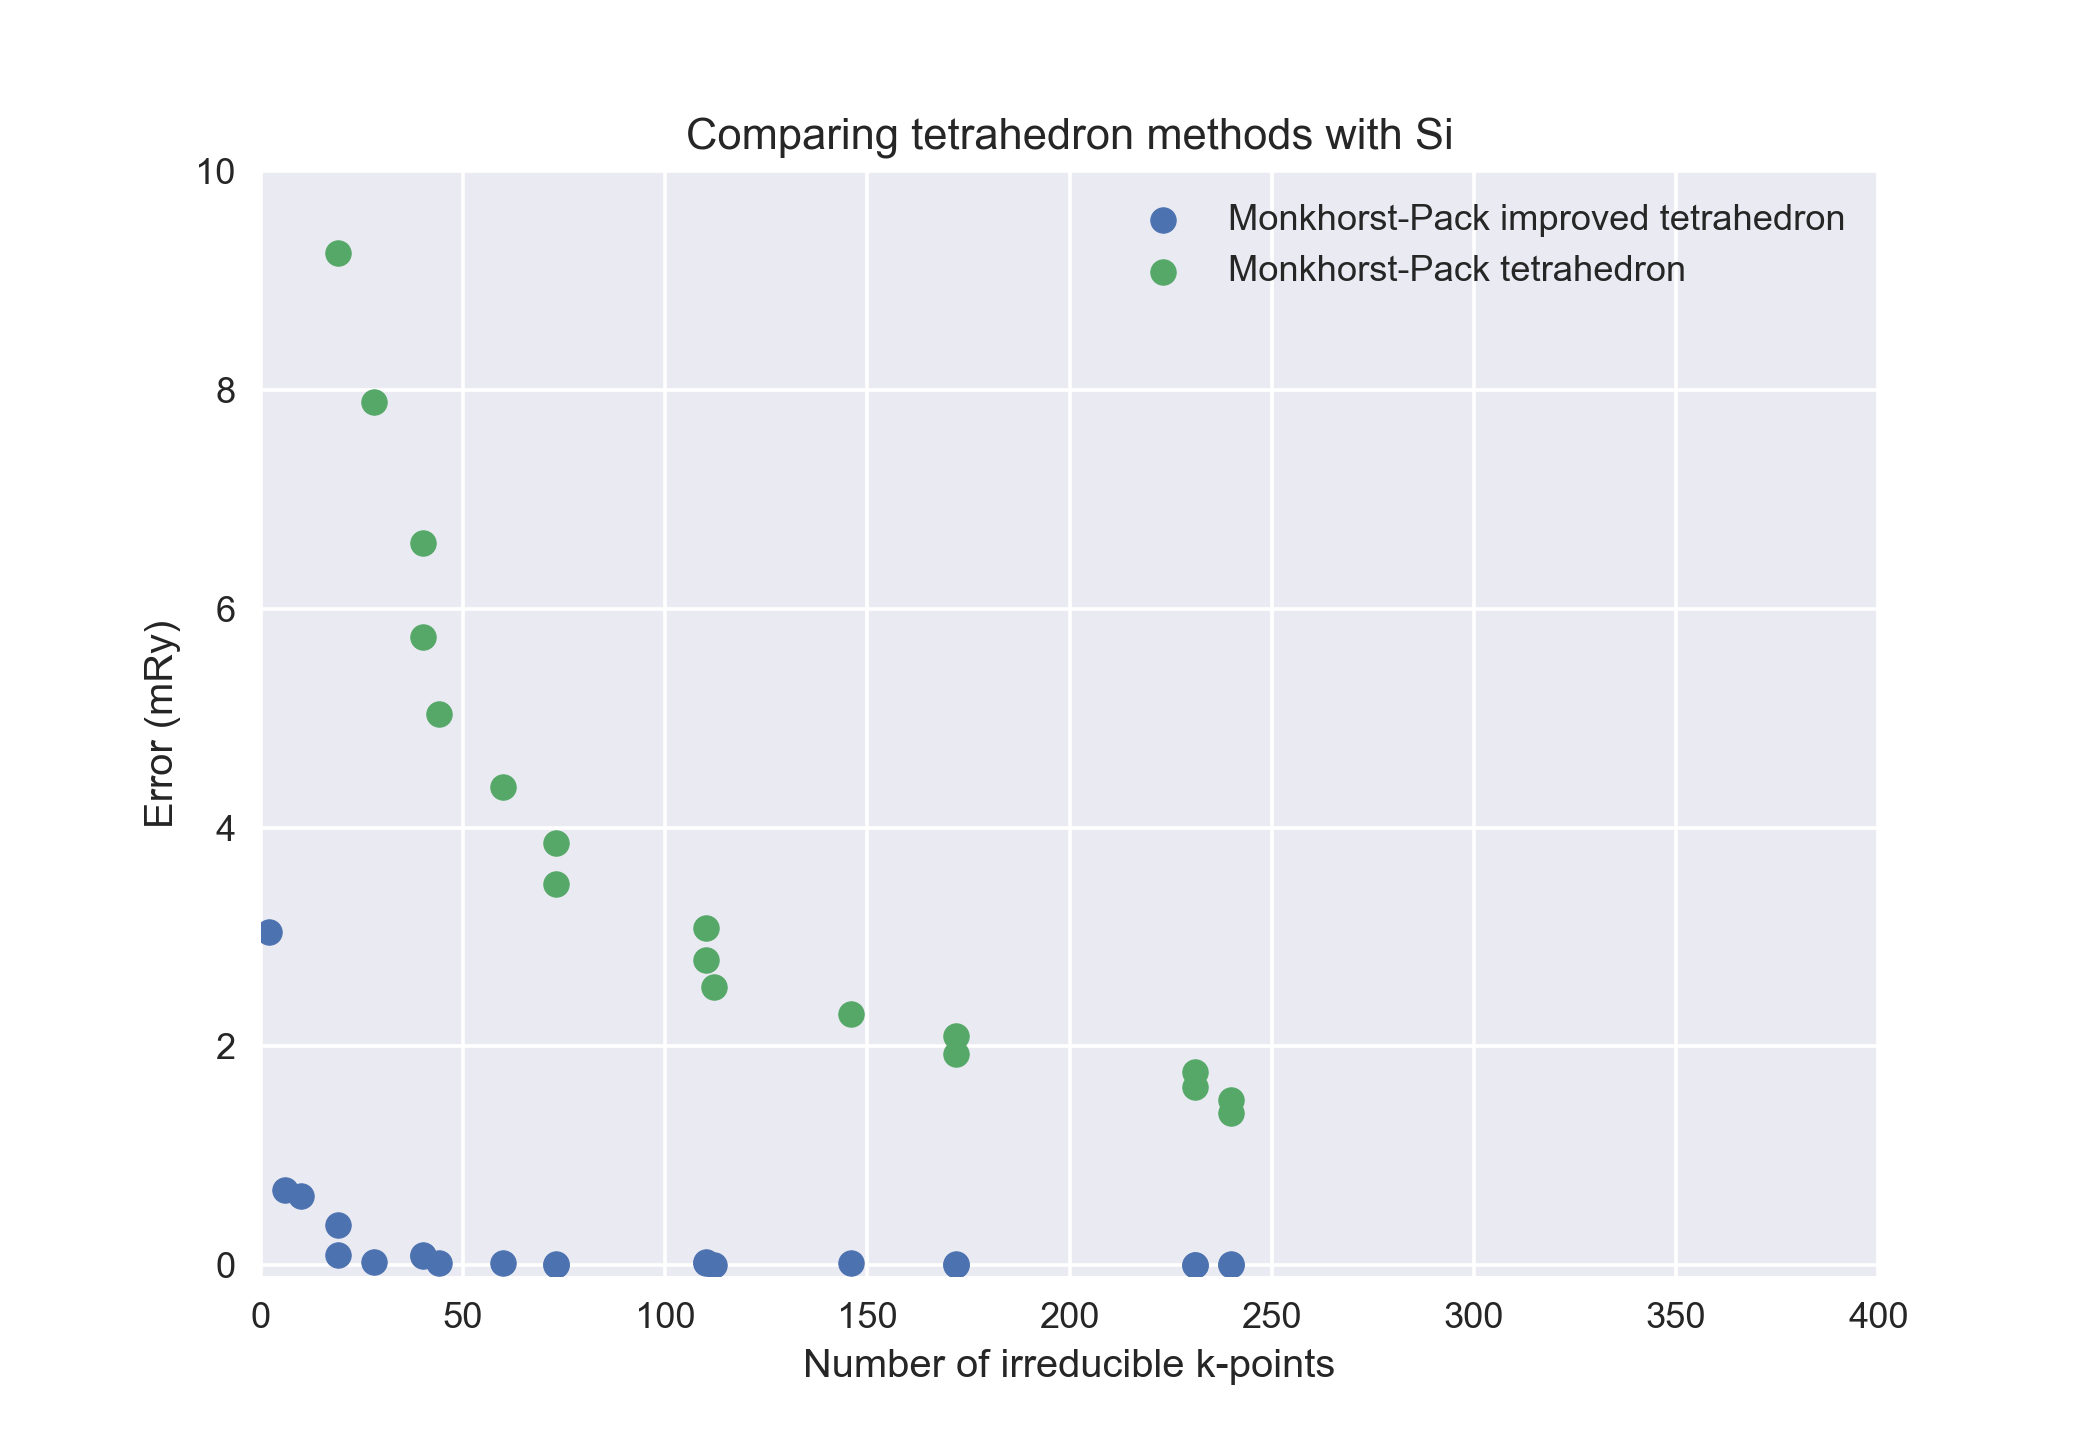

In [18]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Si_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Si_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
        data = Si_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) for k in np.array(data.kpoints)]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Si")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_ylim(-1e-1,10)
ax.set_xlim(0,400)
# lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Si_fig1.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


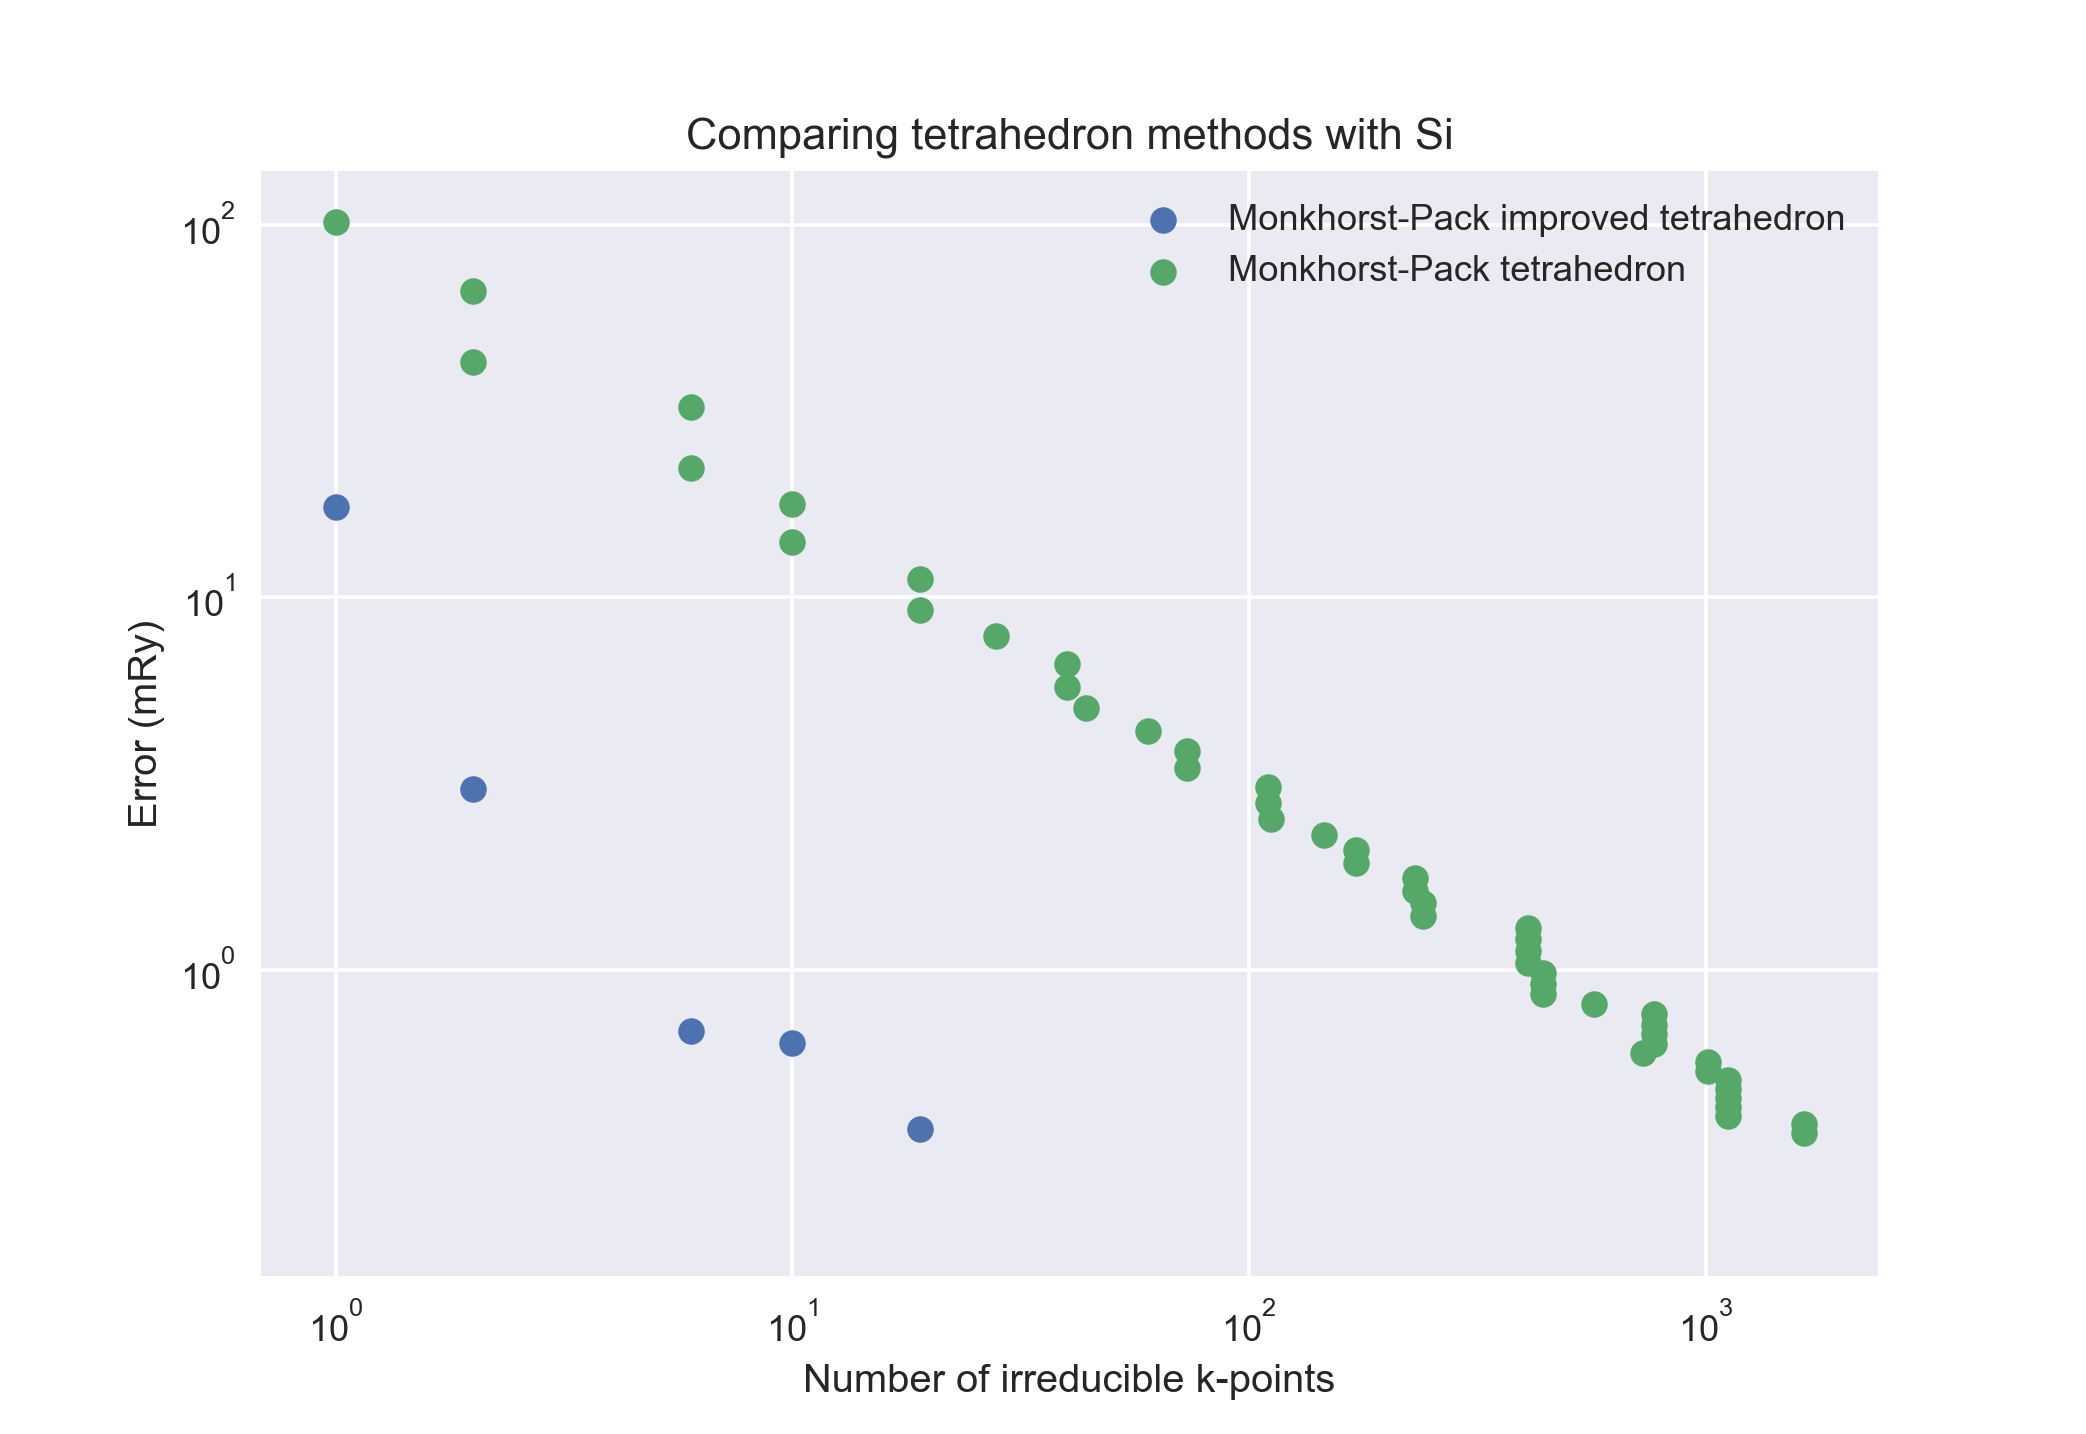

In [19]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Si_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Si_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
        data = Si_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) for k in np.array(data.kpoints)]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Si")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_yscale("log")
ax.set_xscale("log")
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Si_fig2.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


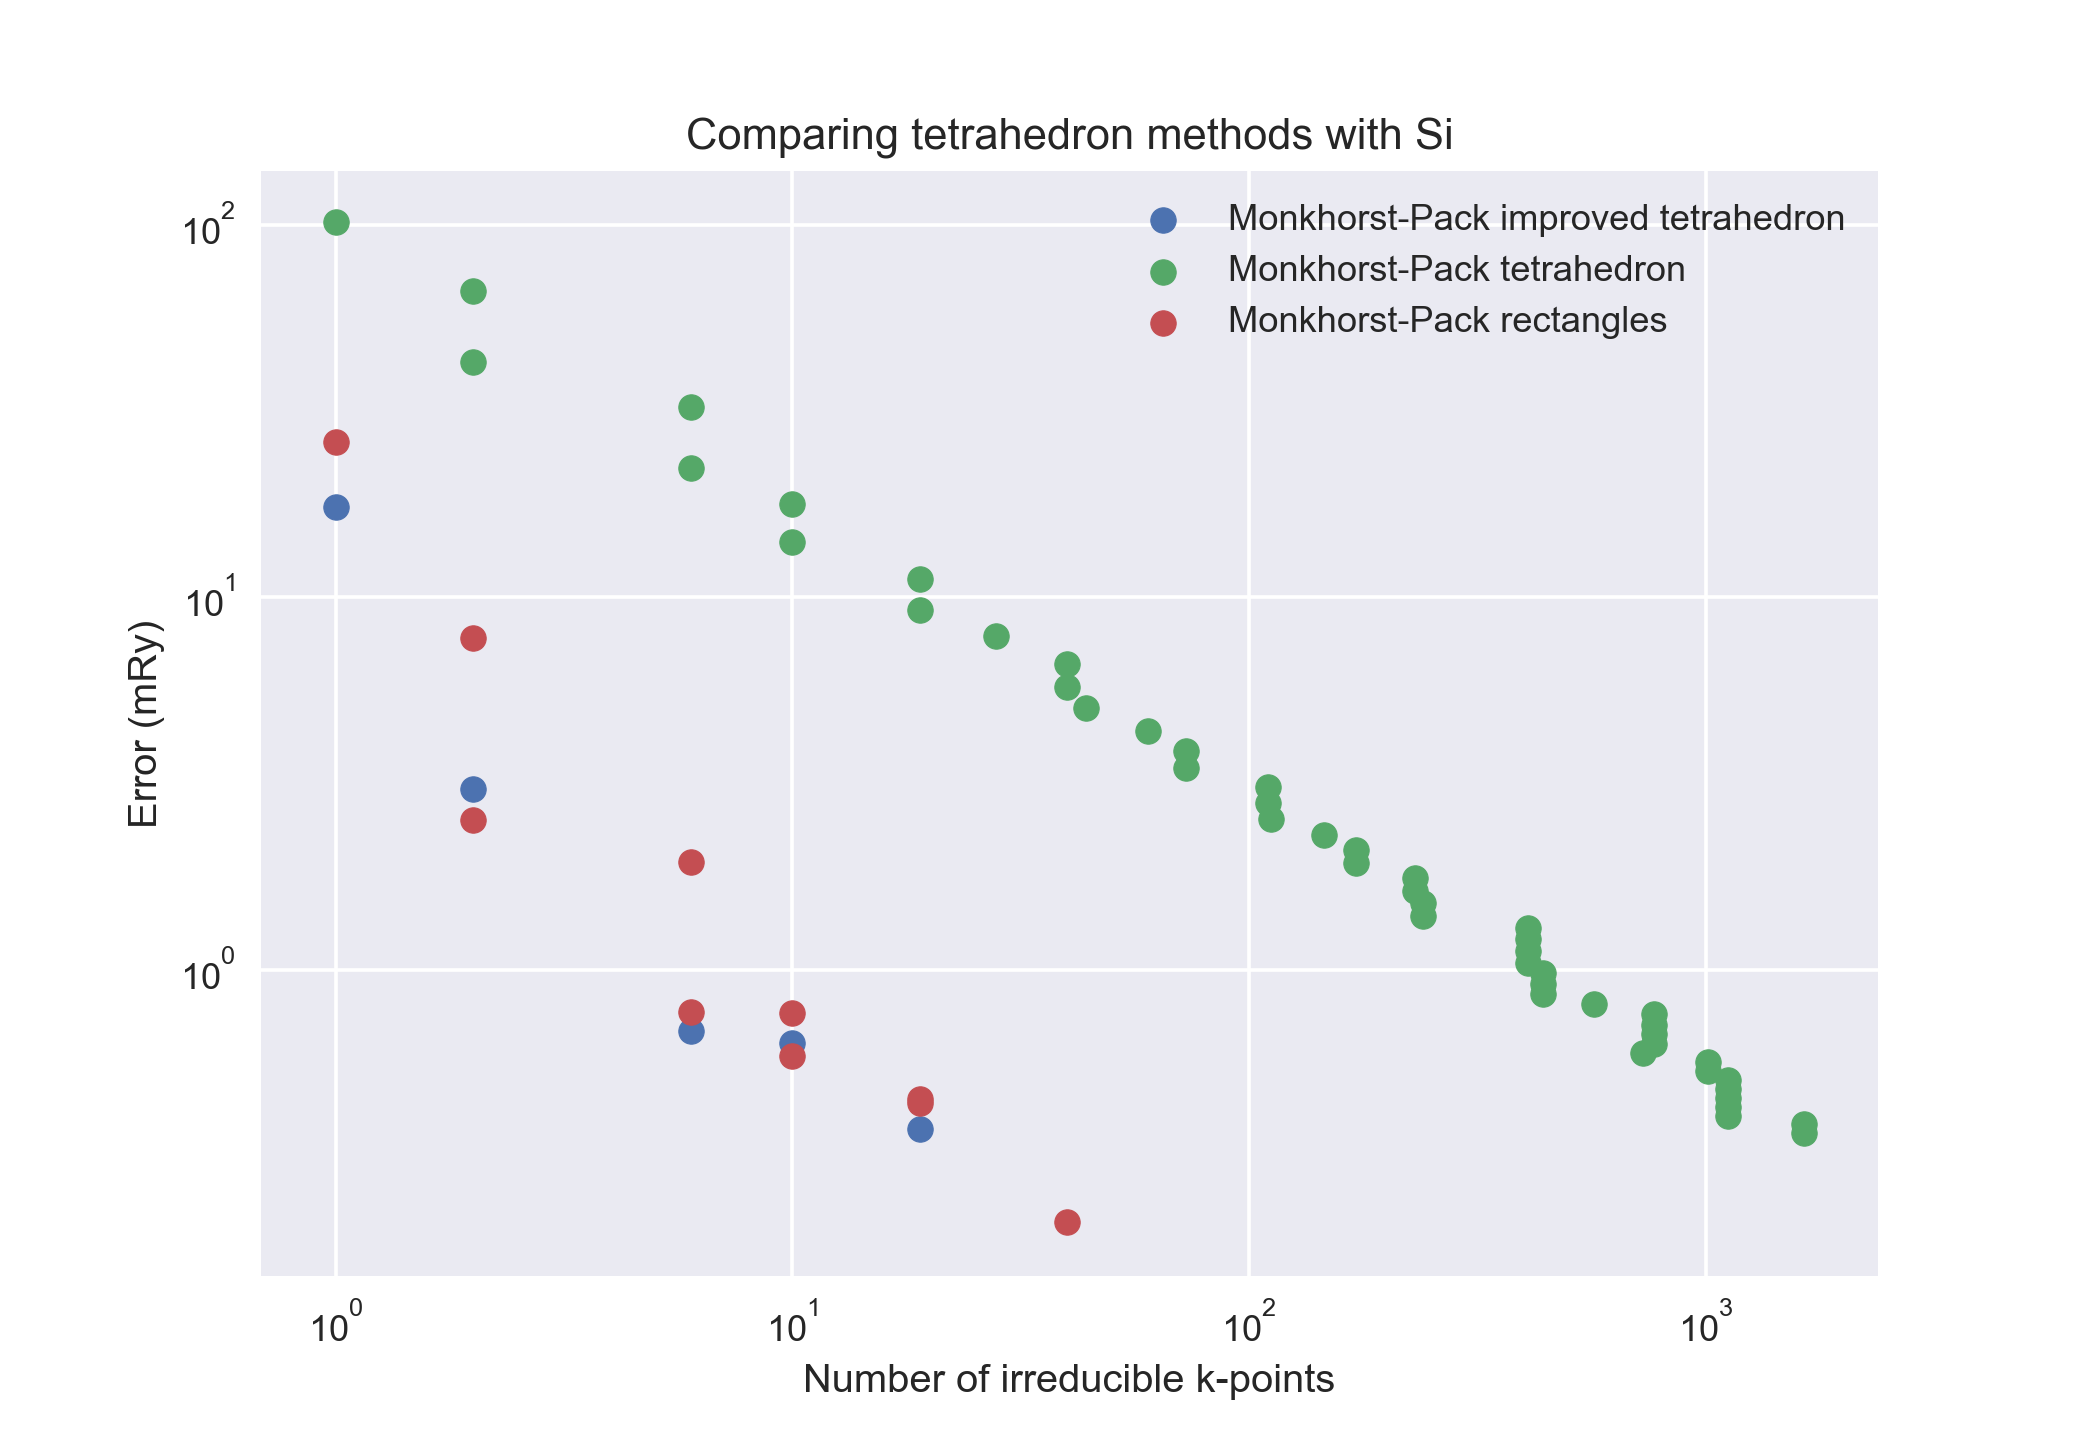

In [20]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Si_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Si_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin", "smearing"]:
        data = Si_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) for k in np.array(data.kpoints)]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Si")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_yscale("log")
ax.set_xscale("log")
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Si_fig3.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


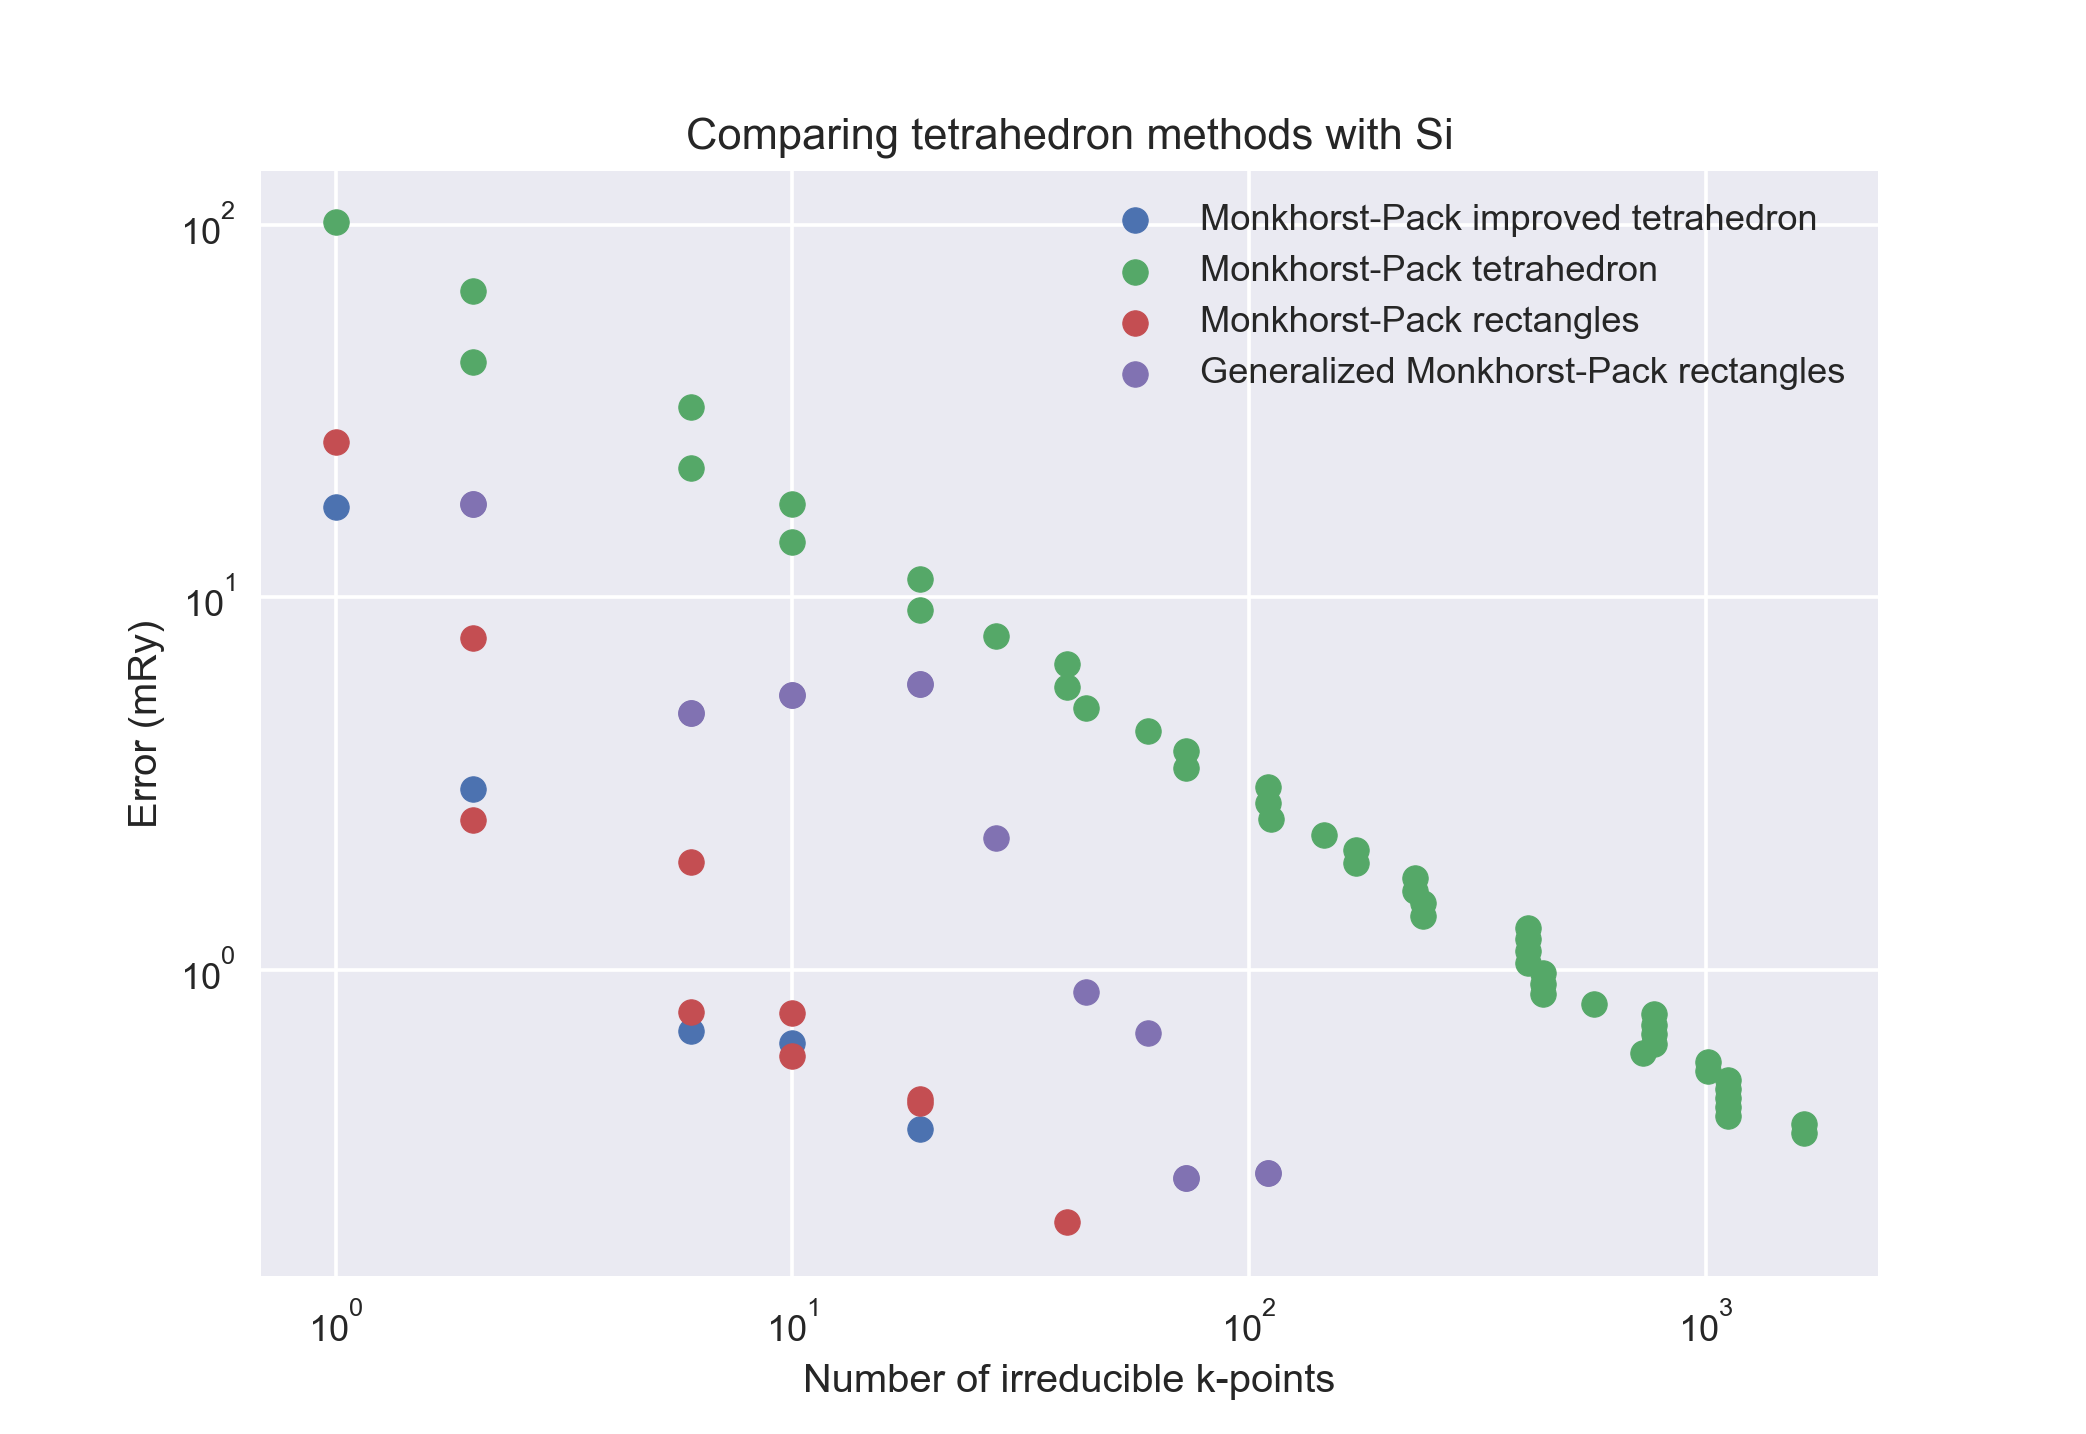

In [21]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
for grid in np.array(Si_data.grid):
    for occupation in np.array(Si_data.occupation):
        if grid == "Generalized Monkhorst-Pack":
            if ((occupation == "tetrahedra") or 
                (occupation == "tetrahedra_lin")):
                continue
            
    # for occupation in ["tetrahedra", "tetrahedra_lin", "smearing"]:
        data = Si_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) for k in np.array(data.kpoints)]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Si")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_yscale("log")
ax.set_xscale("log")
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Si_fig4.pdf")
fig.savefig(file, bbox_inches="tight")

# Cu

<IPython.core.display.Javascript object>


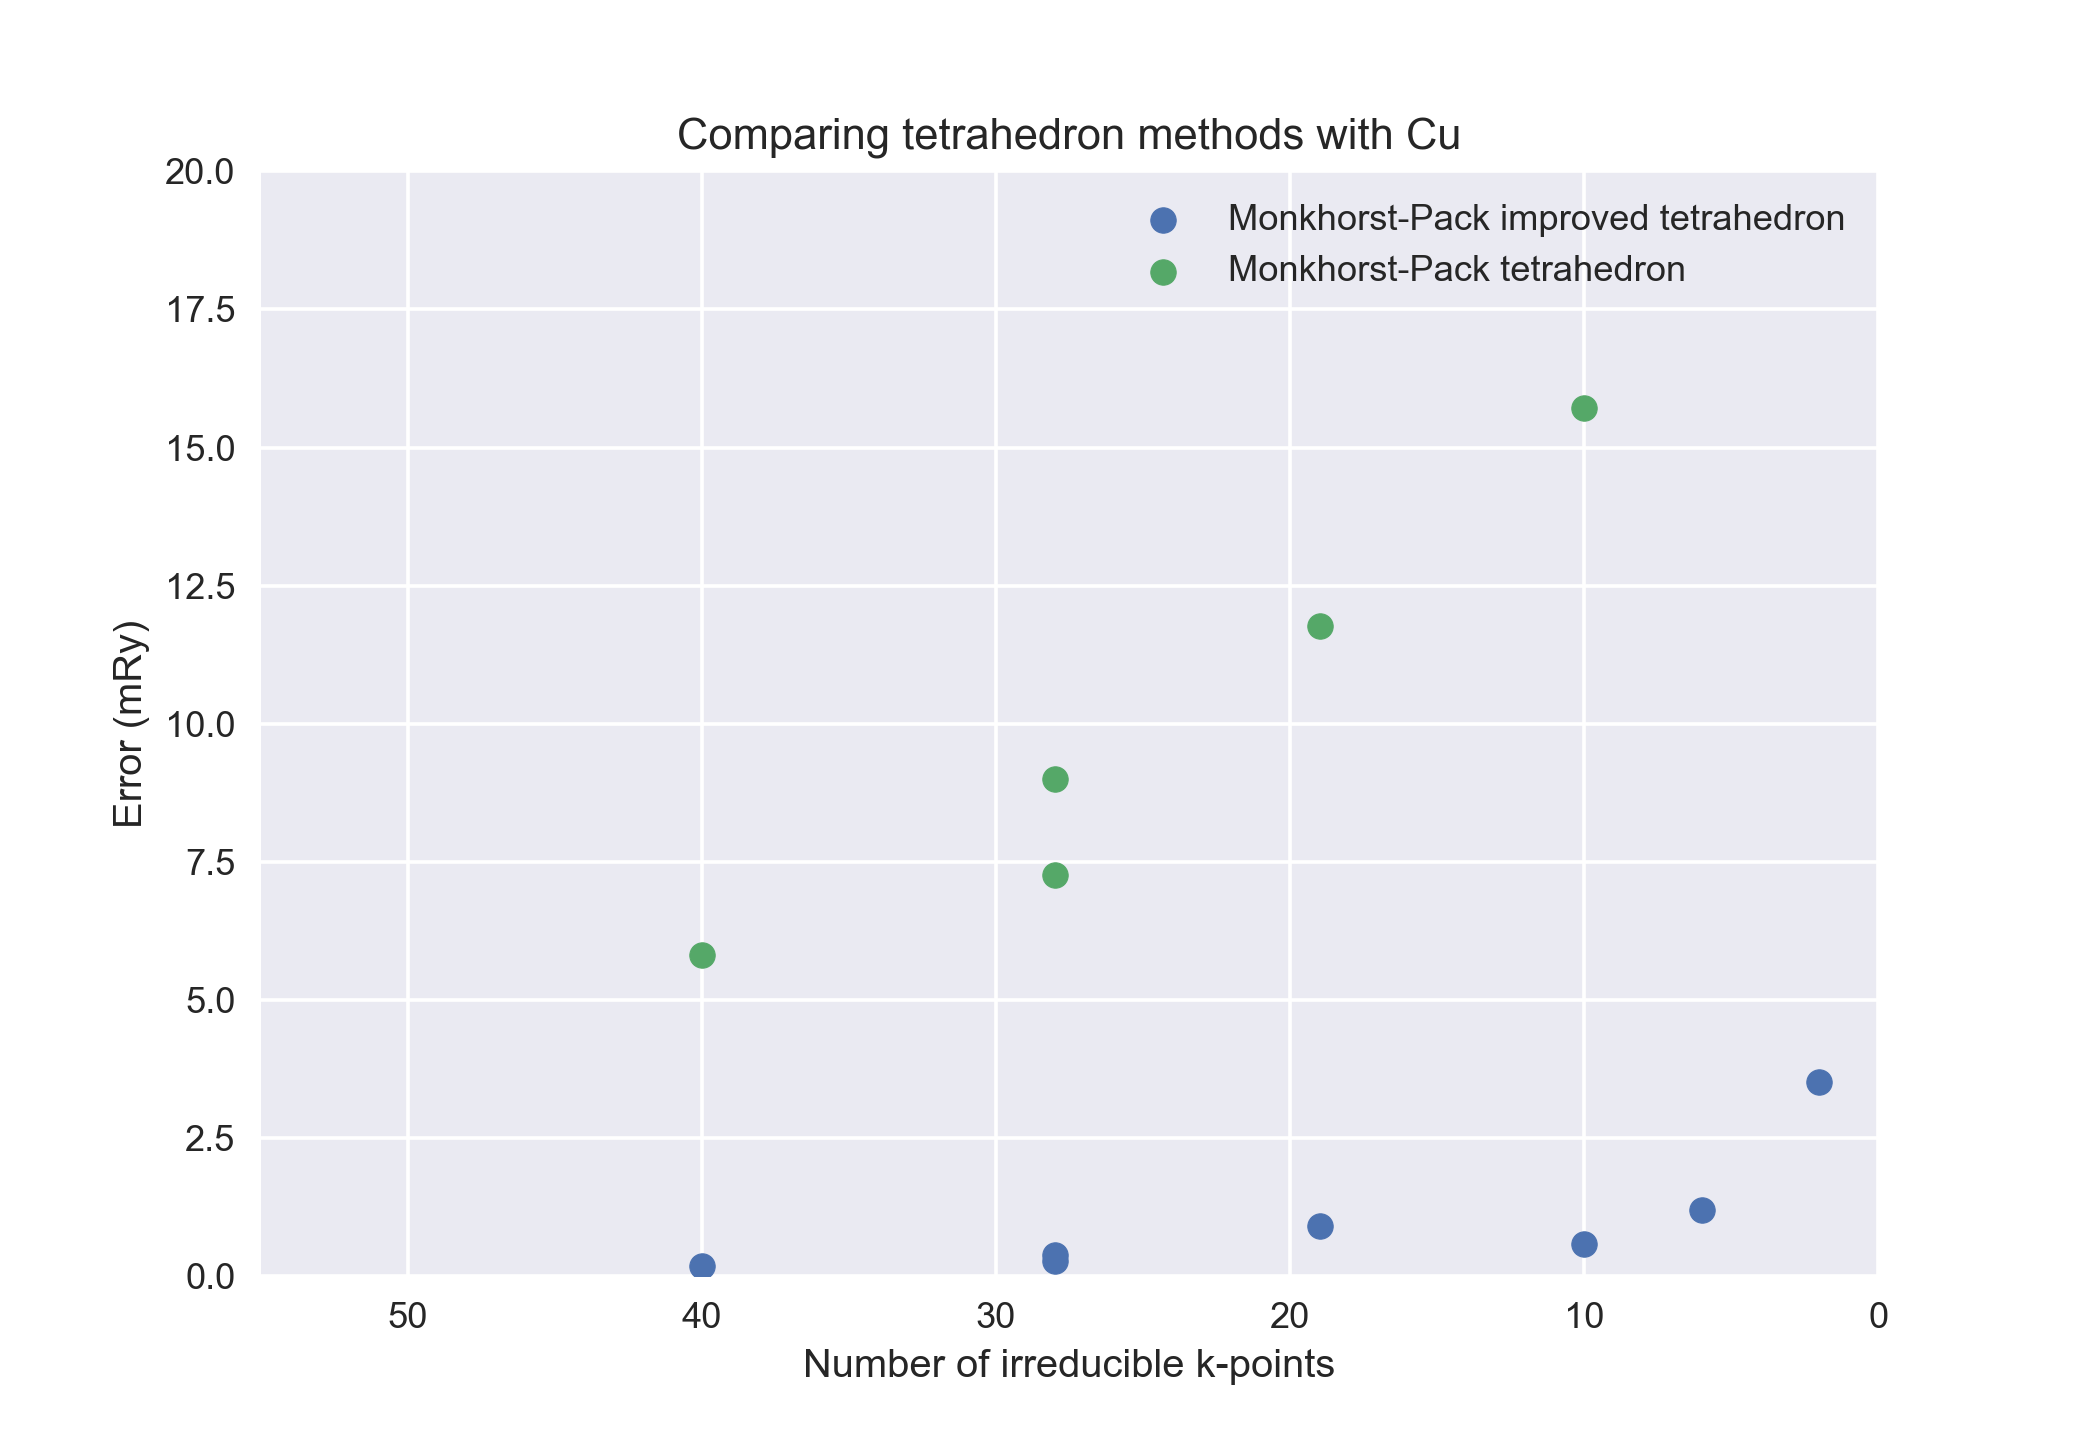

In [33]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Cu_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Cu_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
        data = Cu_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) for k in np.array(data.kpoints)]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Cu")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
# ax.set_yscale("log")
# ax.set_ylim(1e-7, 1e-1)
ax.set_xlim(0, 55)
ax.invert_xaxis()
ax.set_ylim(0, 20)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Cu_fig1.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


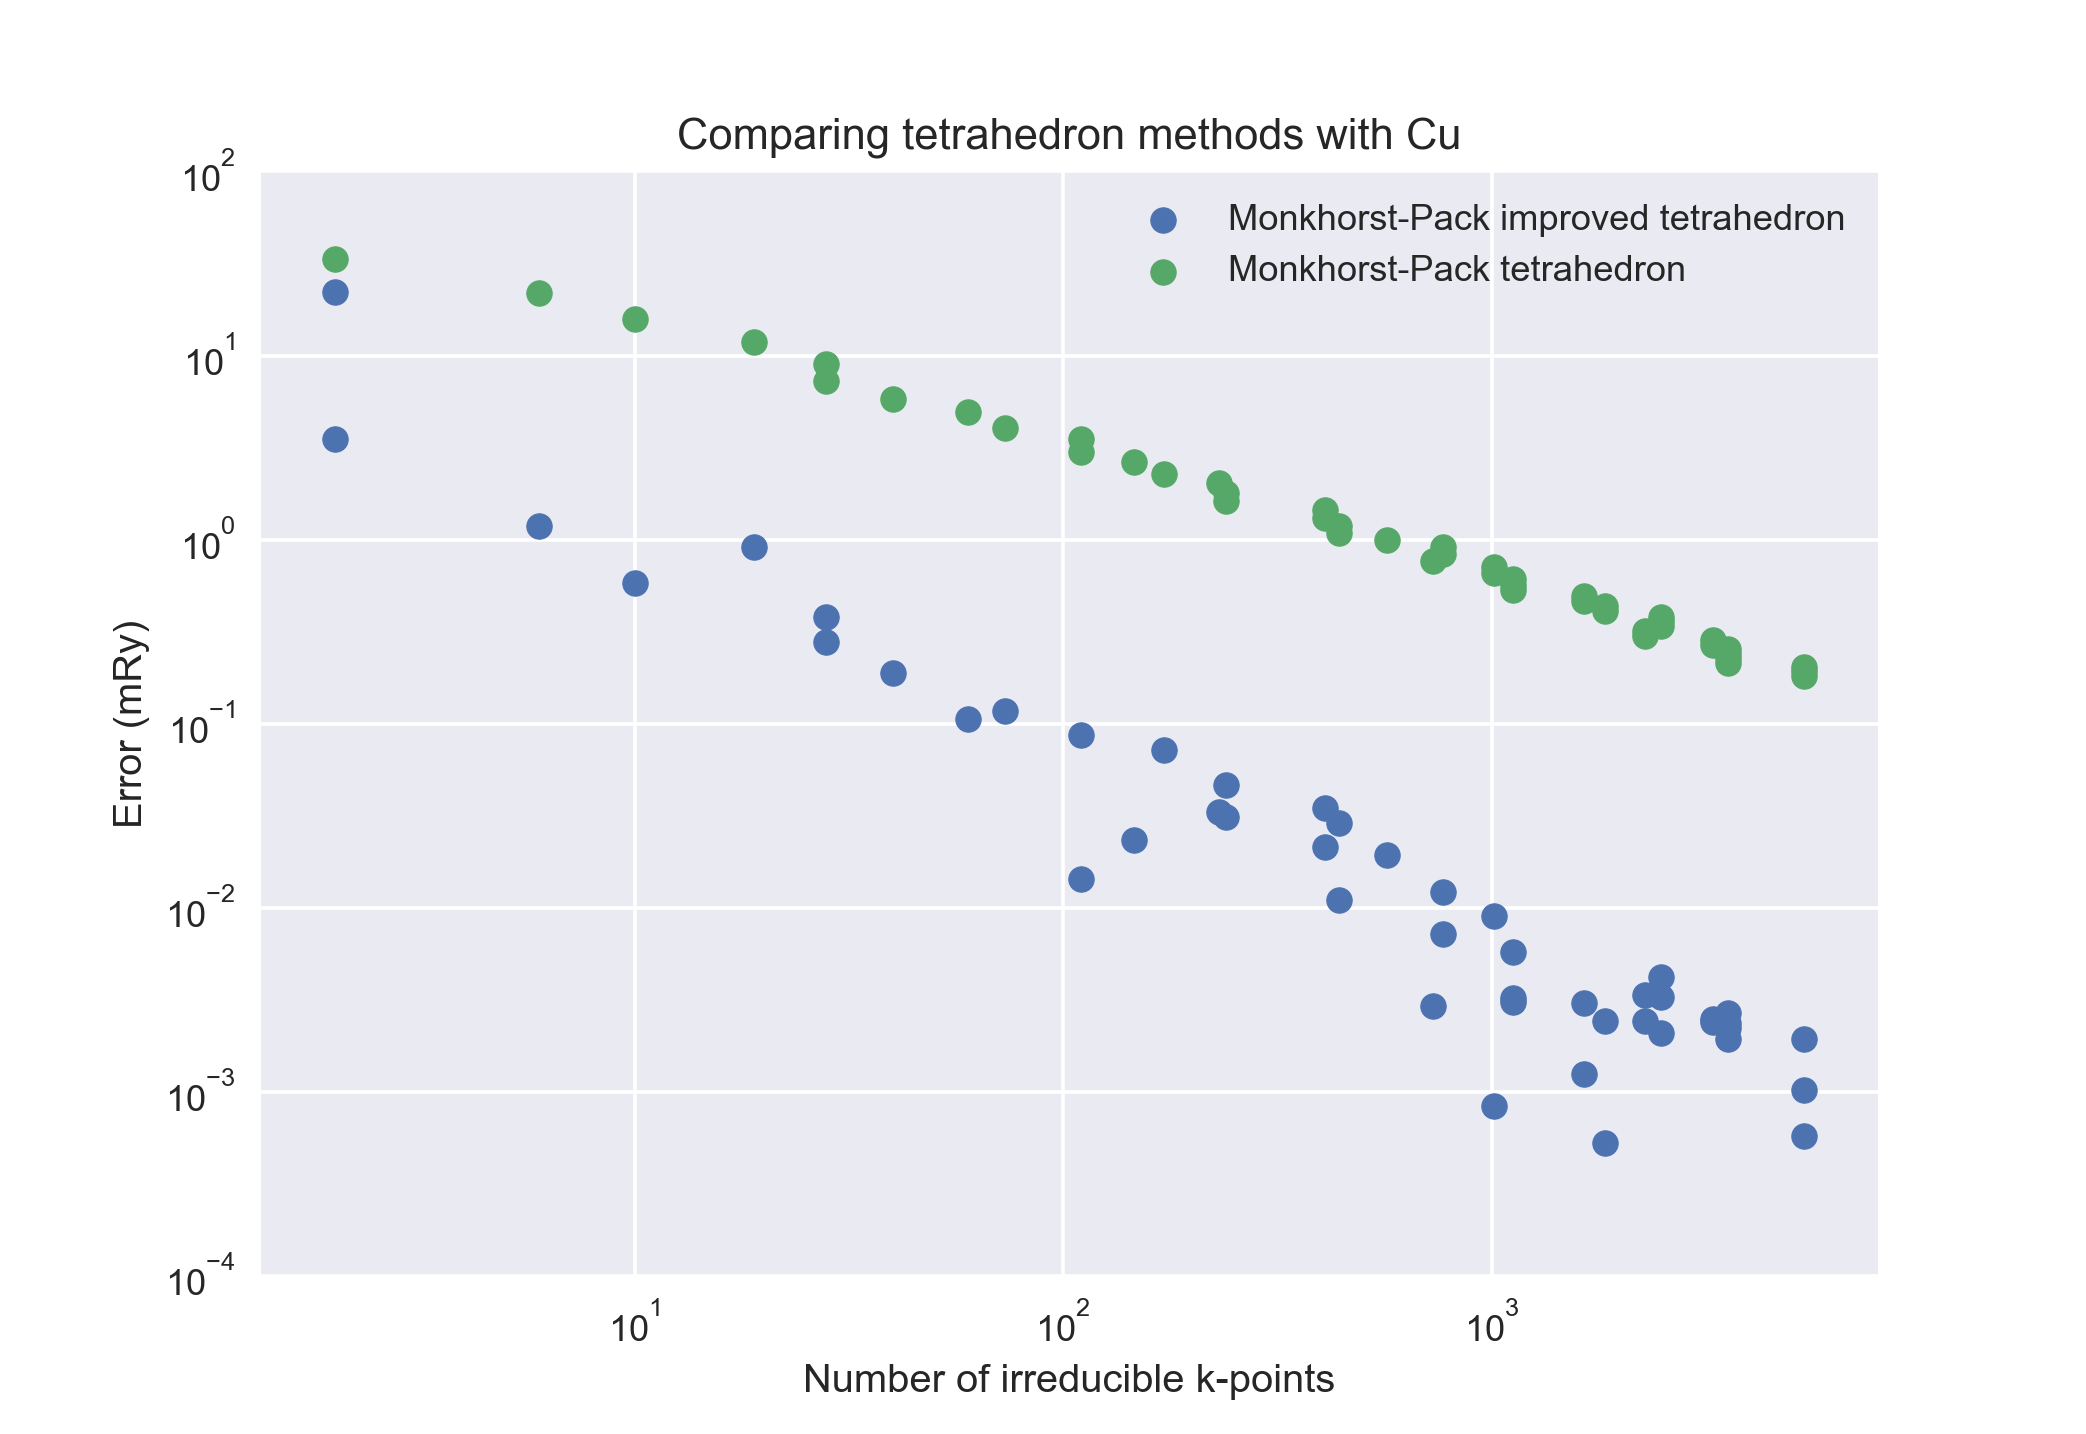

In [24]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Cu_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Cu_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
    # for occupation in ["tetrahedra_lin"]:
        data = Cu_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)]#[:-1][::-1]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Cu")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Cu_fig2.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


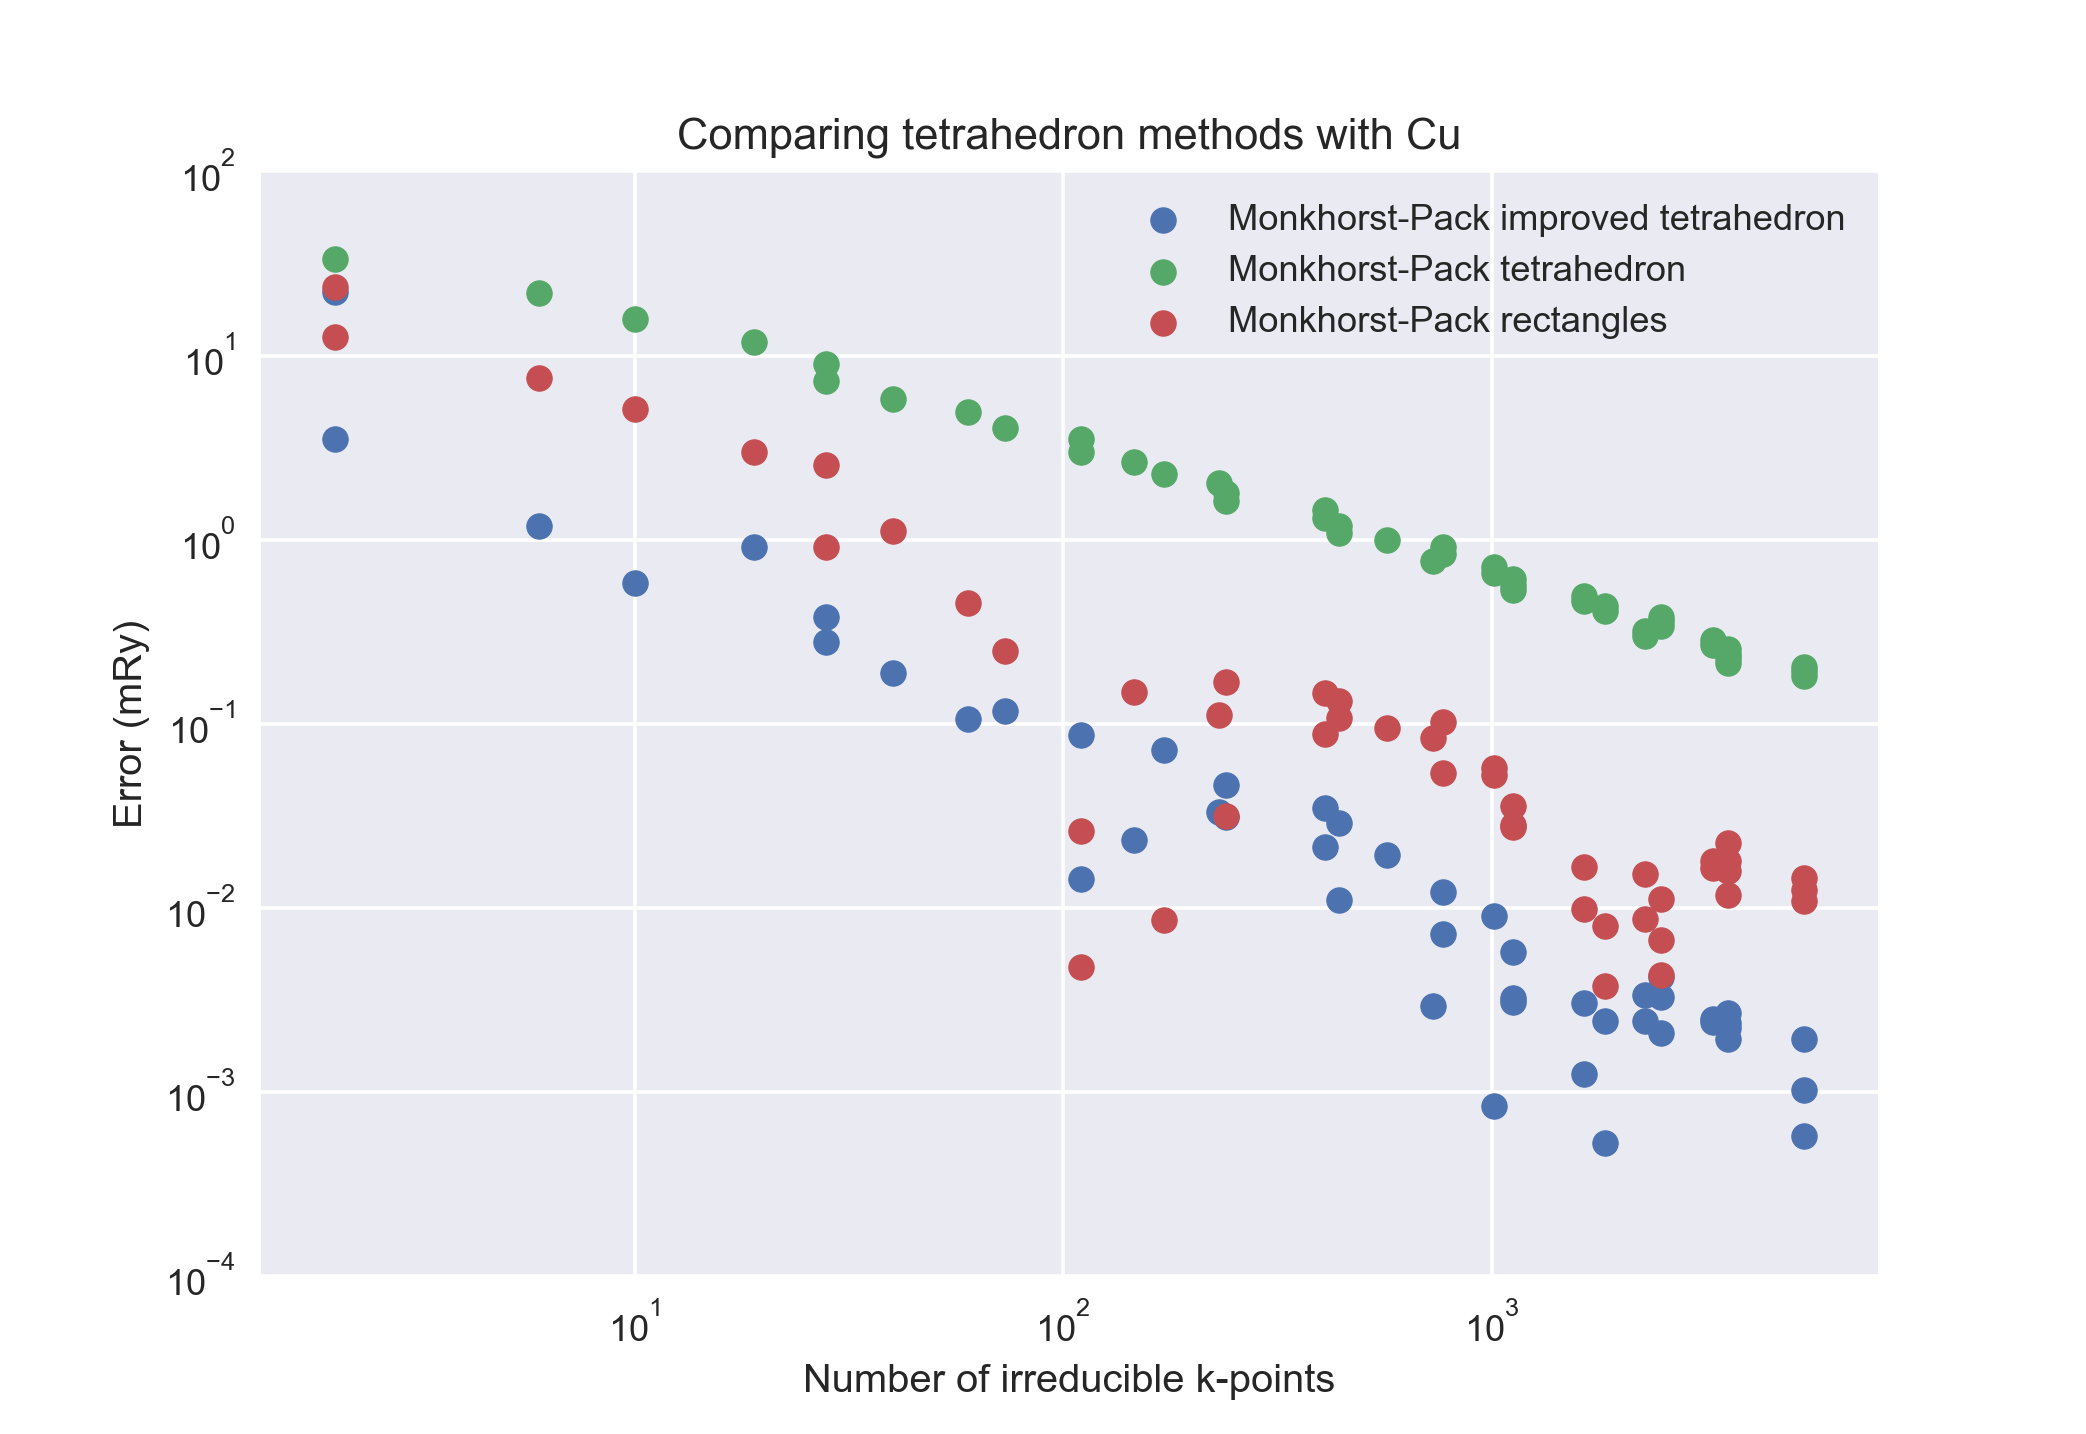

In [32]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(Cu_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(Cu_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin", "smearing"]:
    # for occupation in ["tetrahedra_lin"]:
        data = Cu_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)]#[:-1][::-1]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Cu")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Cu_fig3.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


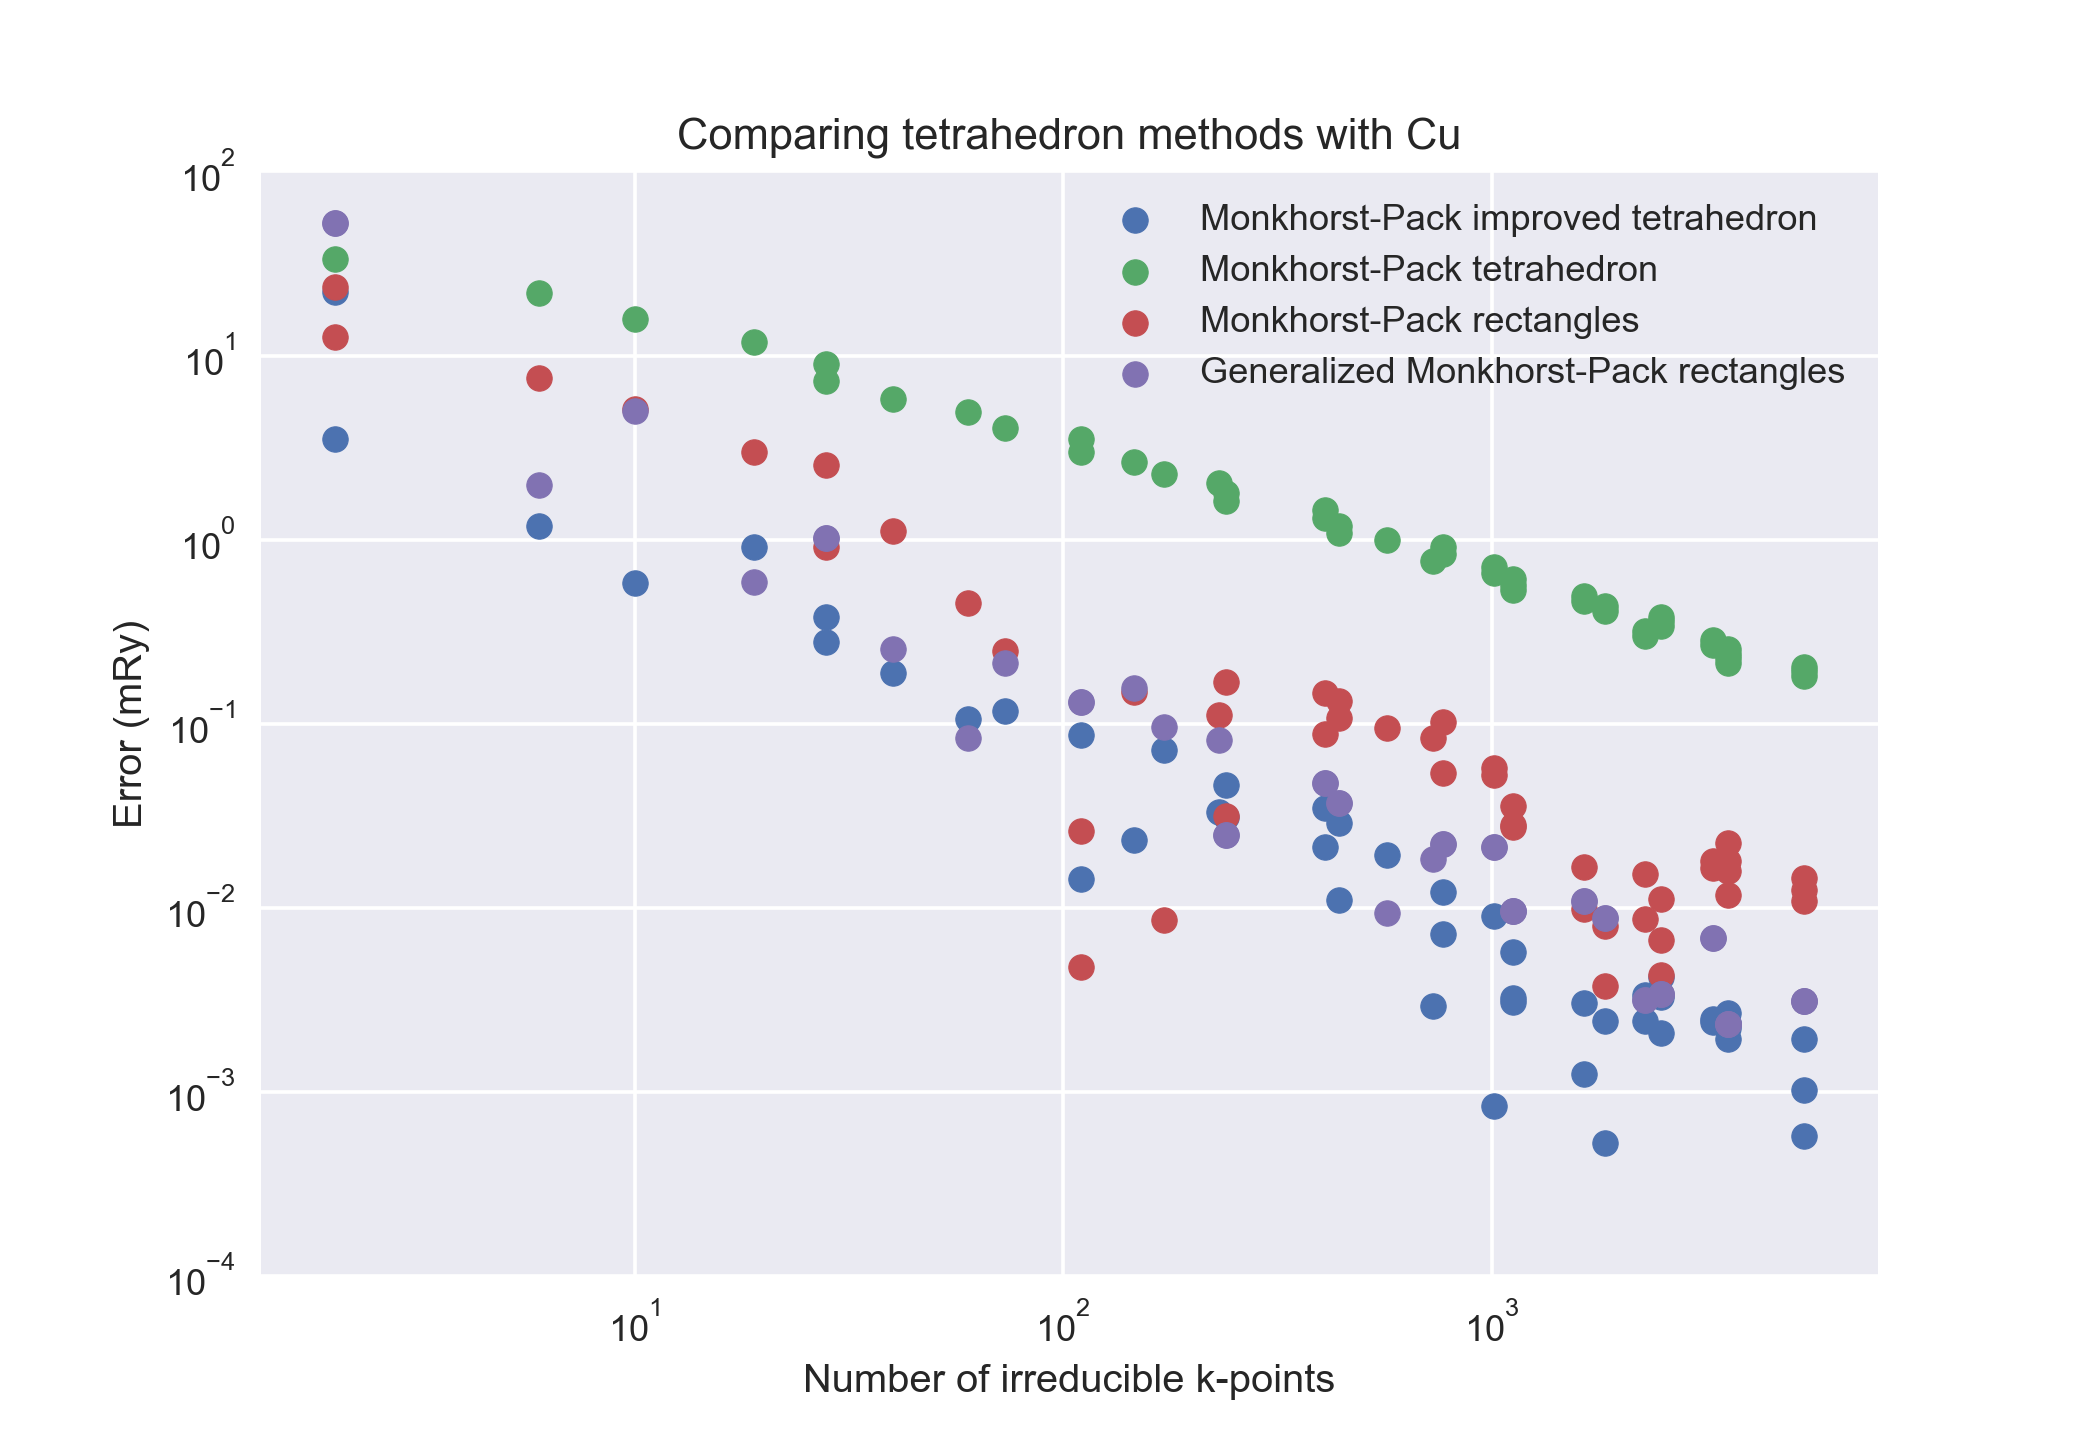

In [31]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
for grid in np.array(Cu_data.grid):
    for occupation in np.array(Cu_data.occupation):        
        if grid == "Generalized Monkhorst-Pack":
            if ((occupation == "tetrahedra") or 
                (occupation == "tetrahedra_lin")):
                continue
        
        data = Cu_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)]#[:-1][::-1]
        data = np.array(data)
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with Cu")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "Cu_fig4.pdf")
fig.savefig(file, bbox_inches="tight")

# $\mathrm{NiSi}_2$

<IPython.core.display.Javascript object>


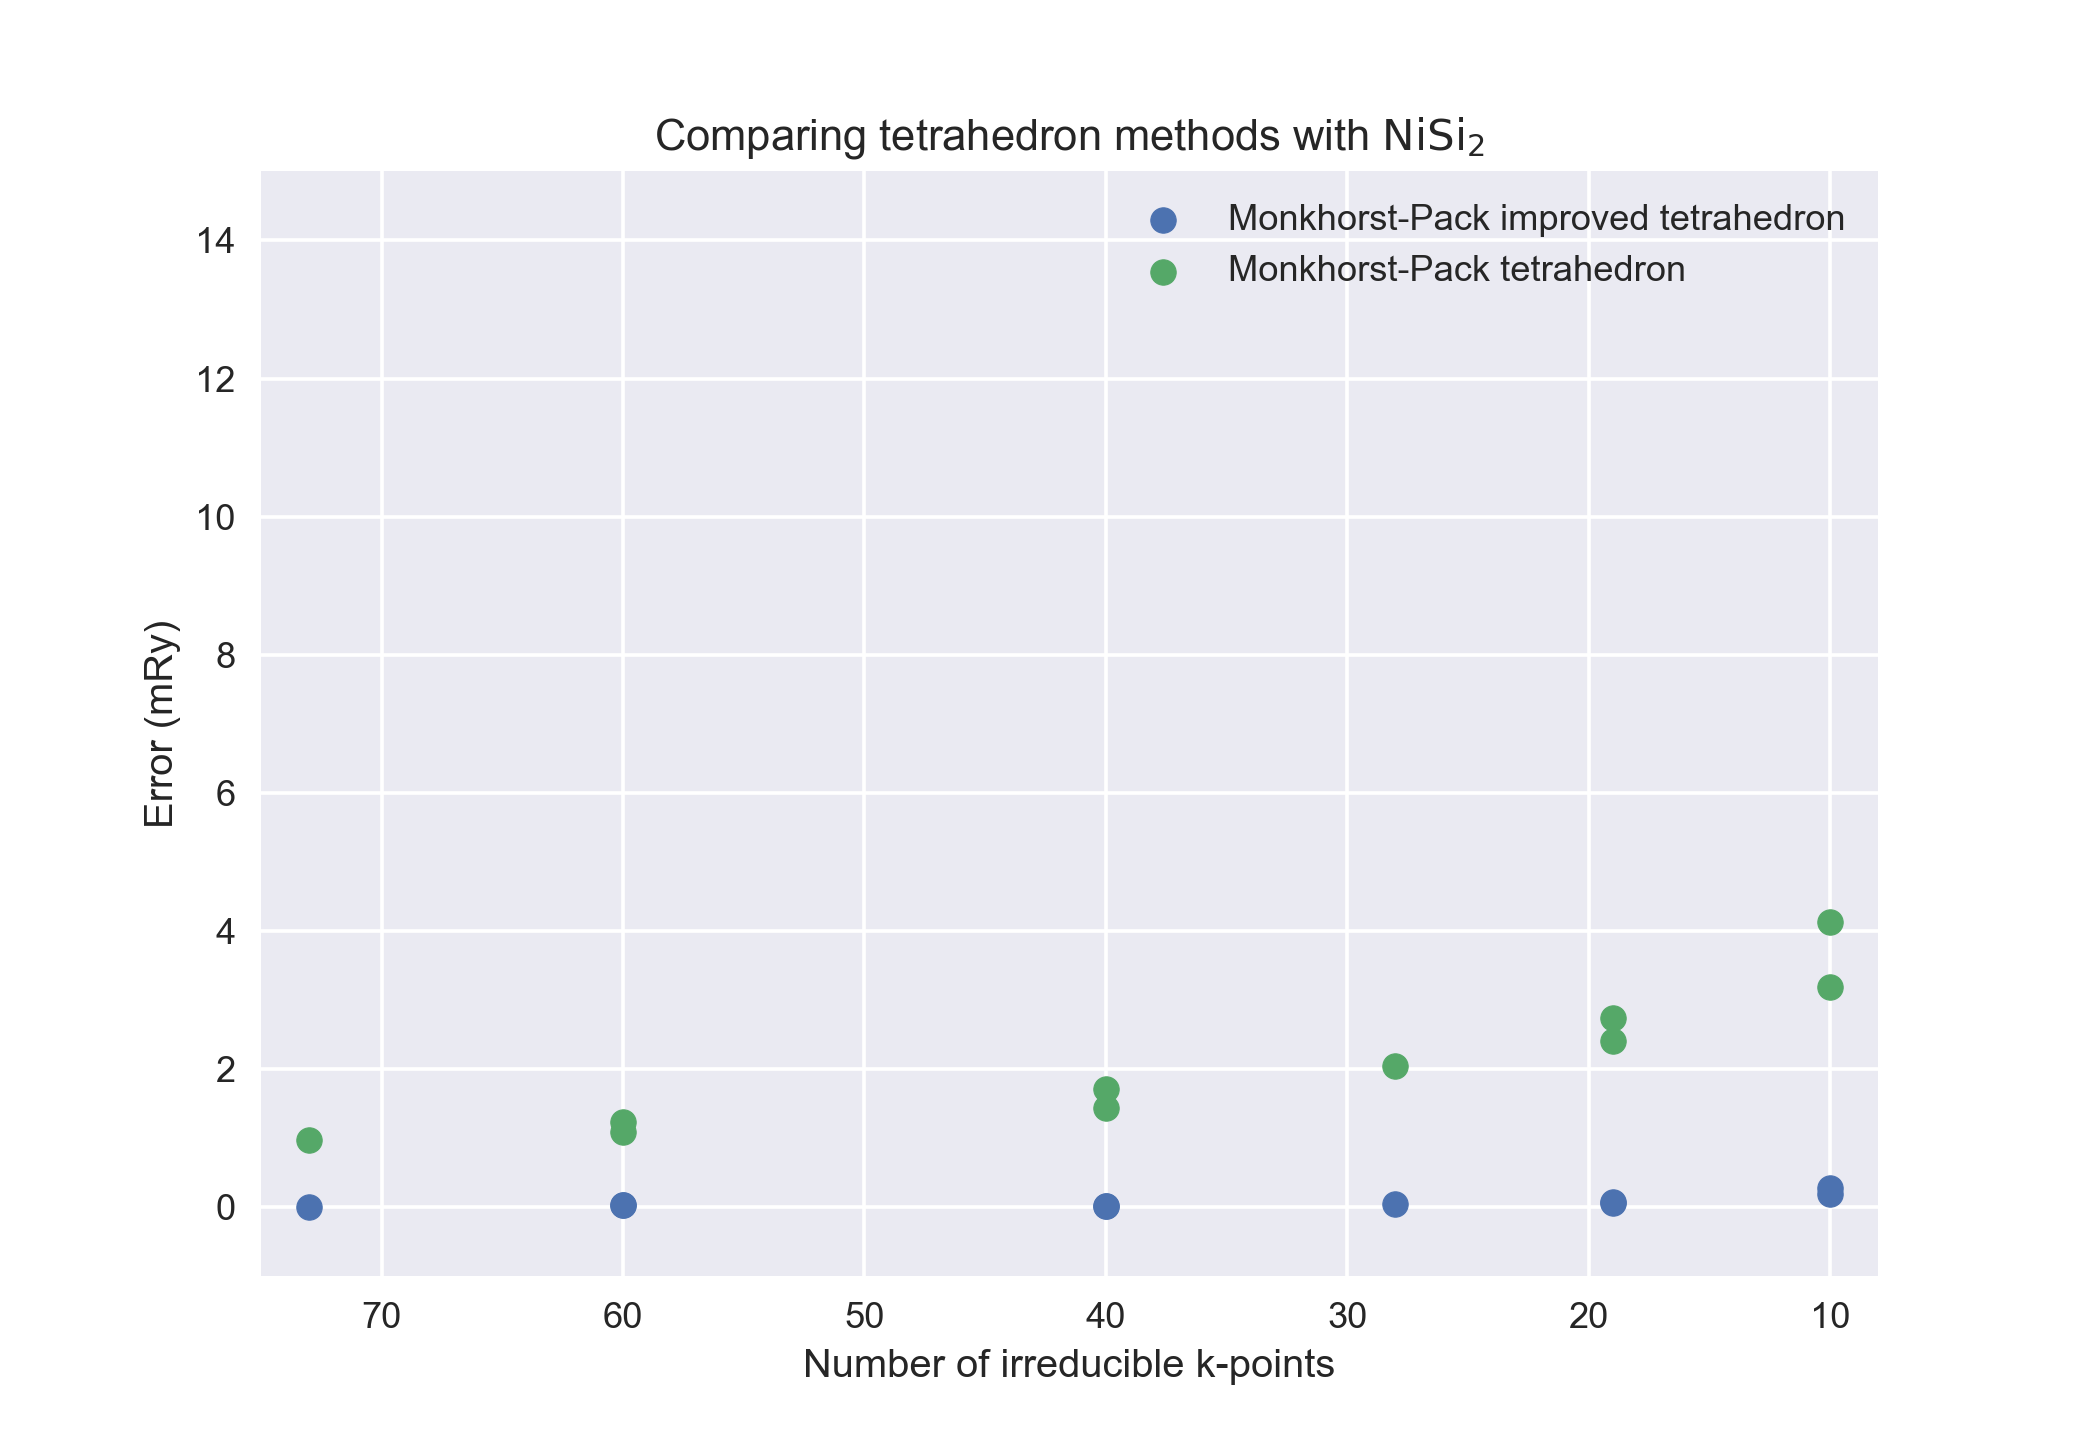

In [27]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(NiSi2_data.grid):
for grid in ["Monkhorst-Pack"]:
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
        data = NiSi2_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)][:-1]
        data = np.array(data)[:-1]
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

ax.set_title("Comparing tetrahedron methods with $\mathrm{NiSi}_2$")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xlim(8, 75)
ax.invert_xaxis()
ax.set_ylim(-1, 15)

lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "NiSi2_fig1.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


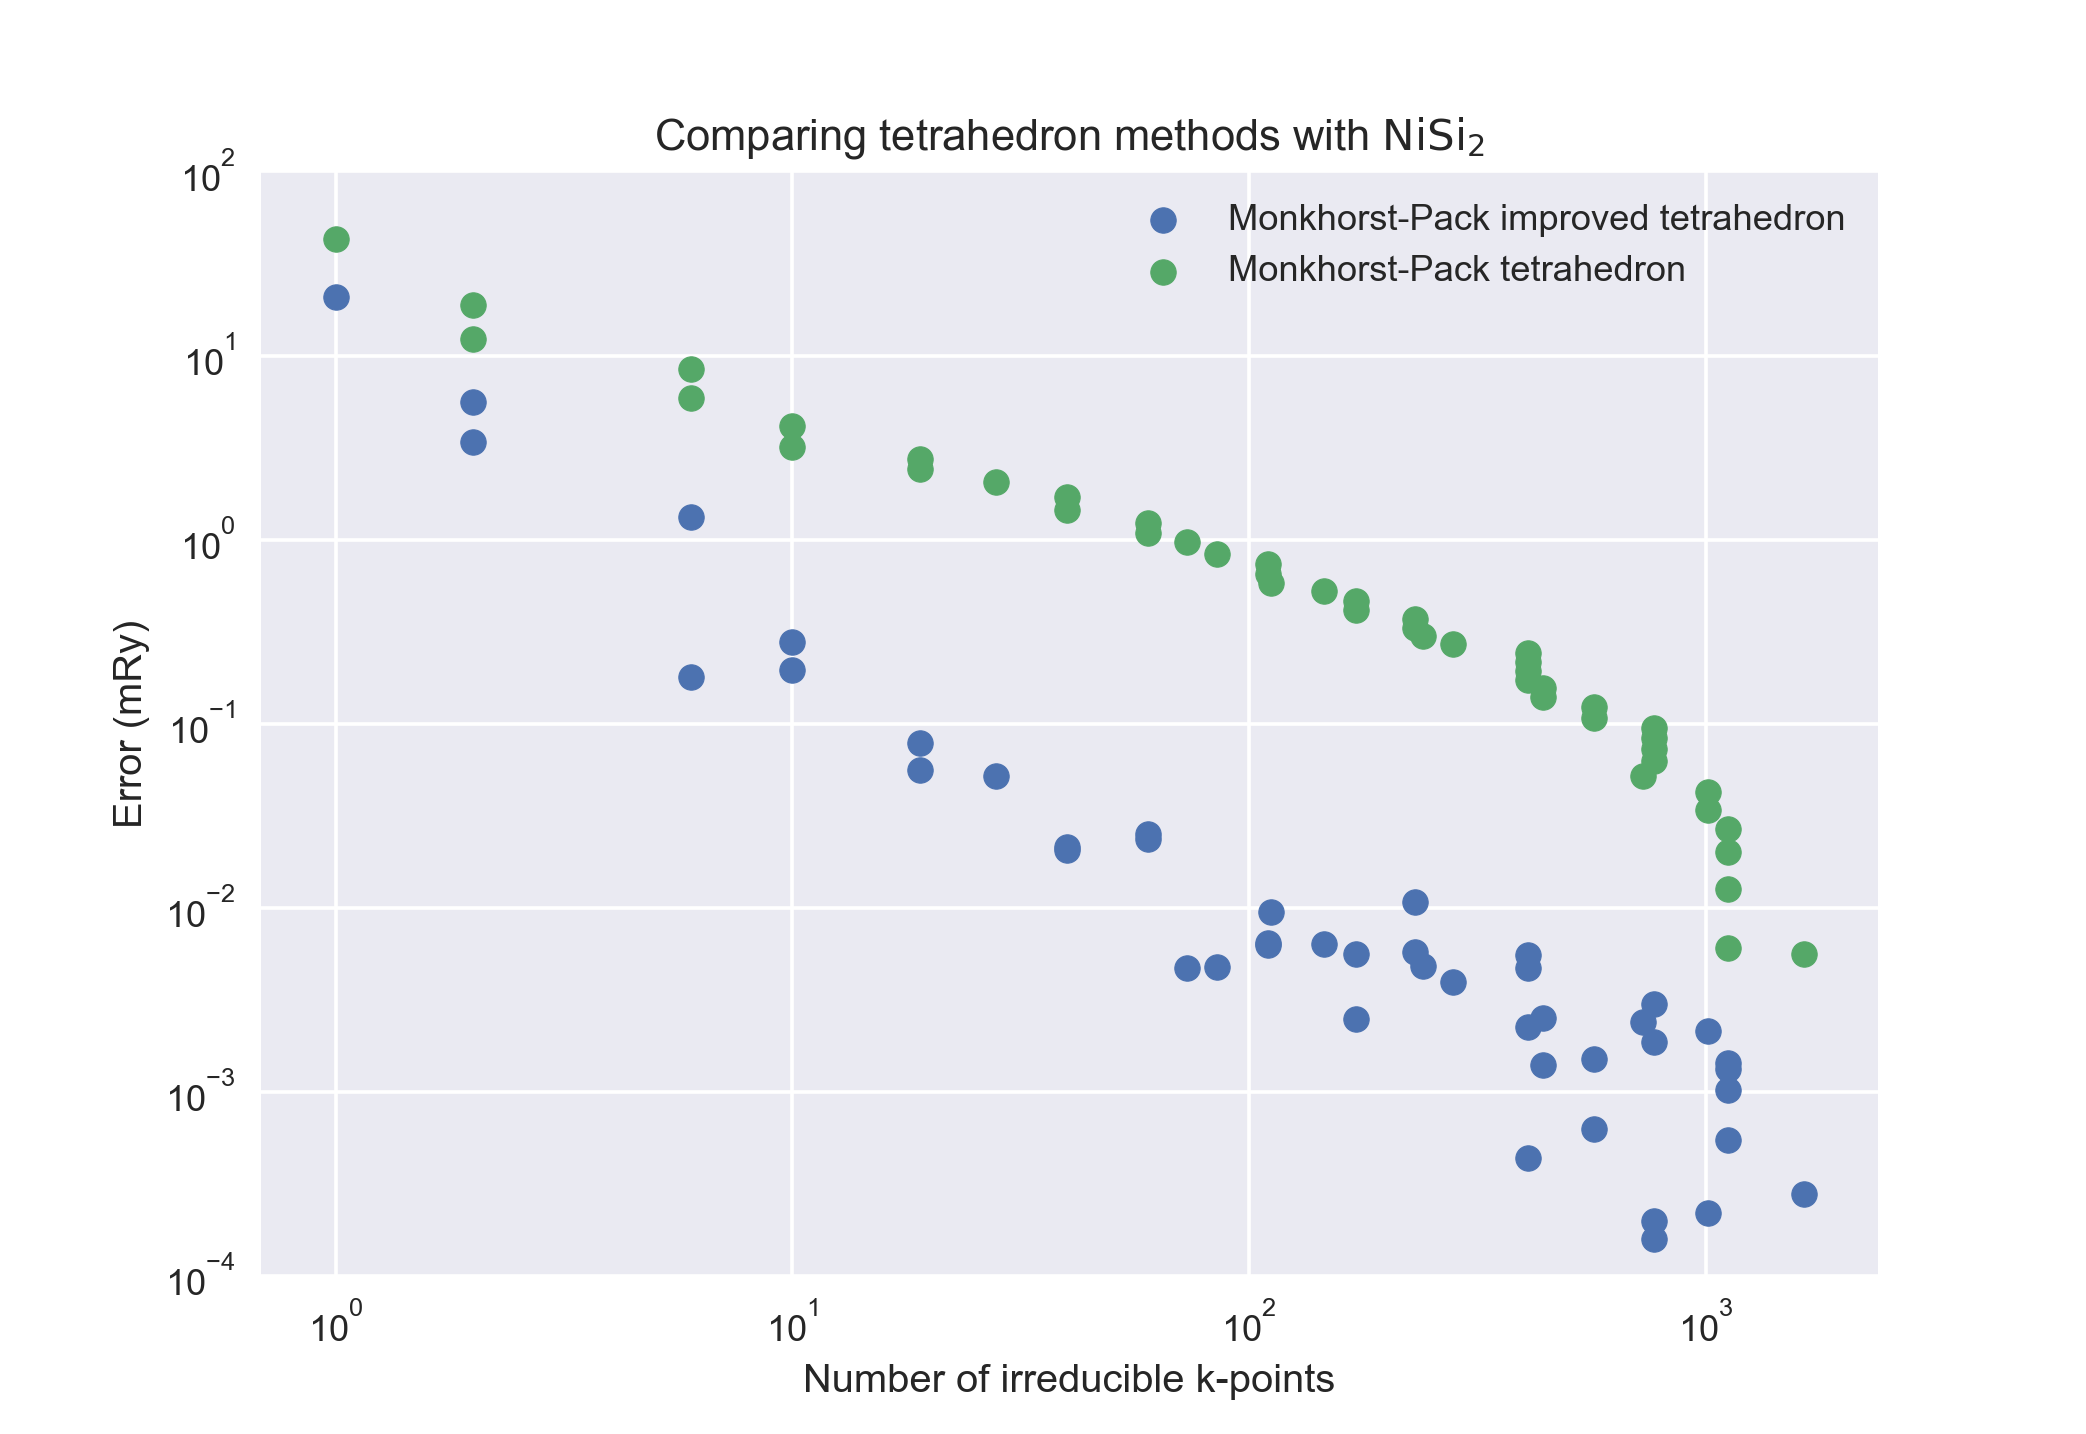

In [28]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(NiSi2_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(NiSi2_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin"]:
    # for occupation in ["tetrahedra_lin"]:
        data = NiSi2_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)][:-1]
        data = np.array(data)[:-1]
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with $\mathrm{NiSi}_2$")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "NiSi2_fig2.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


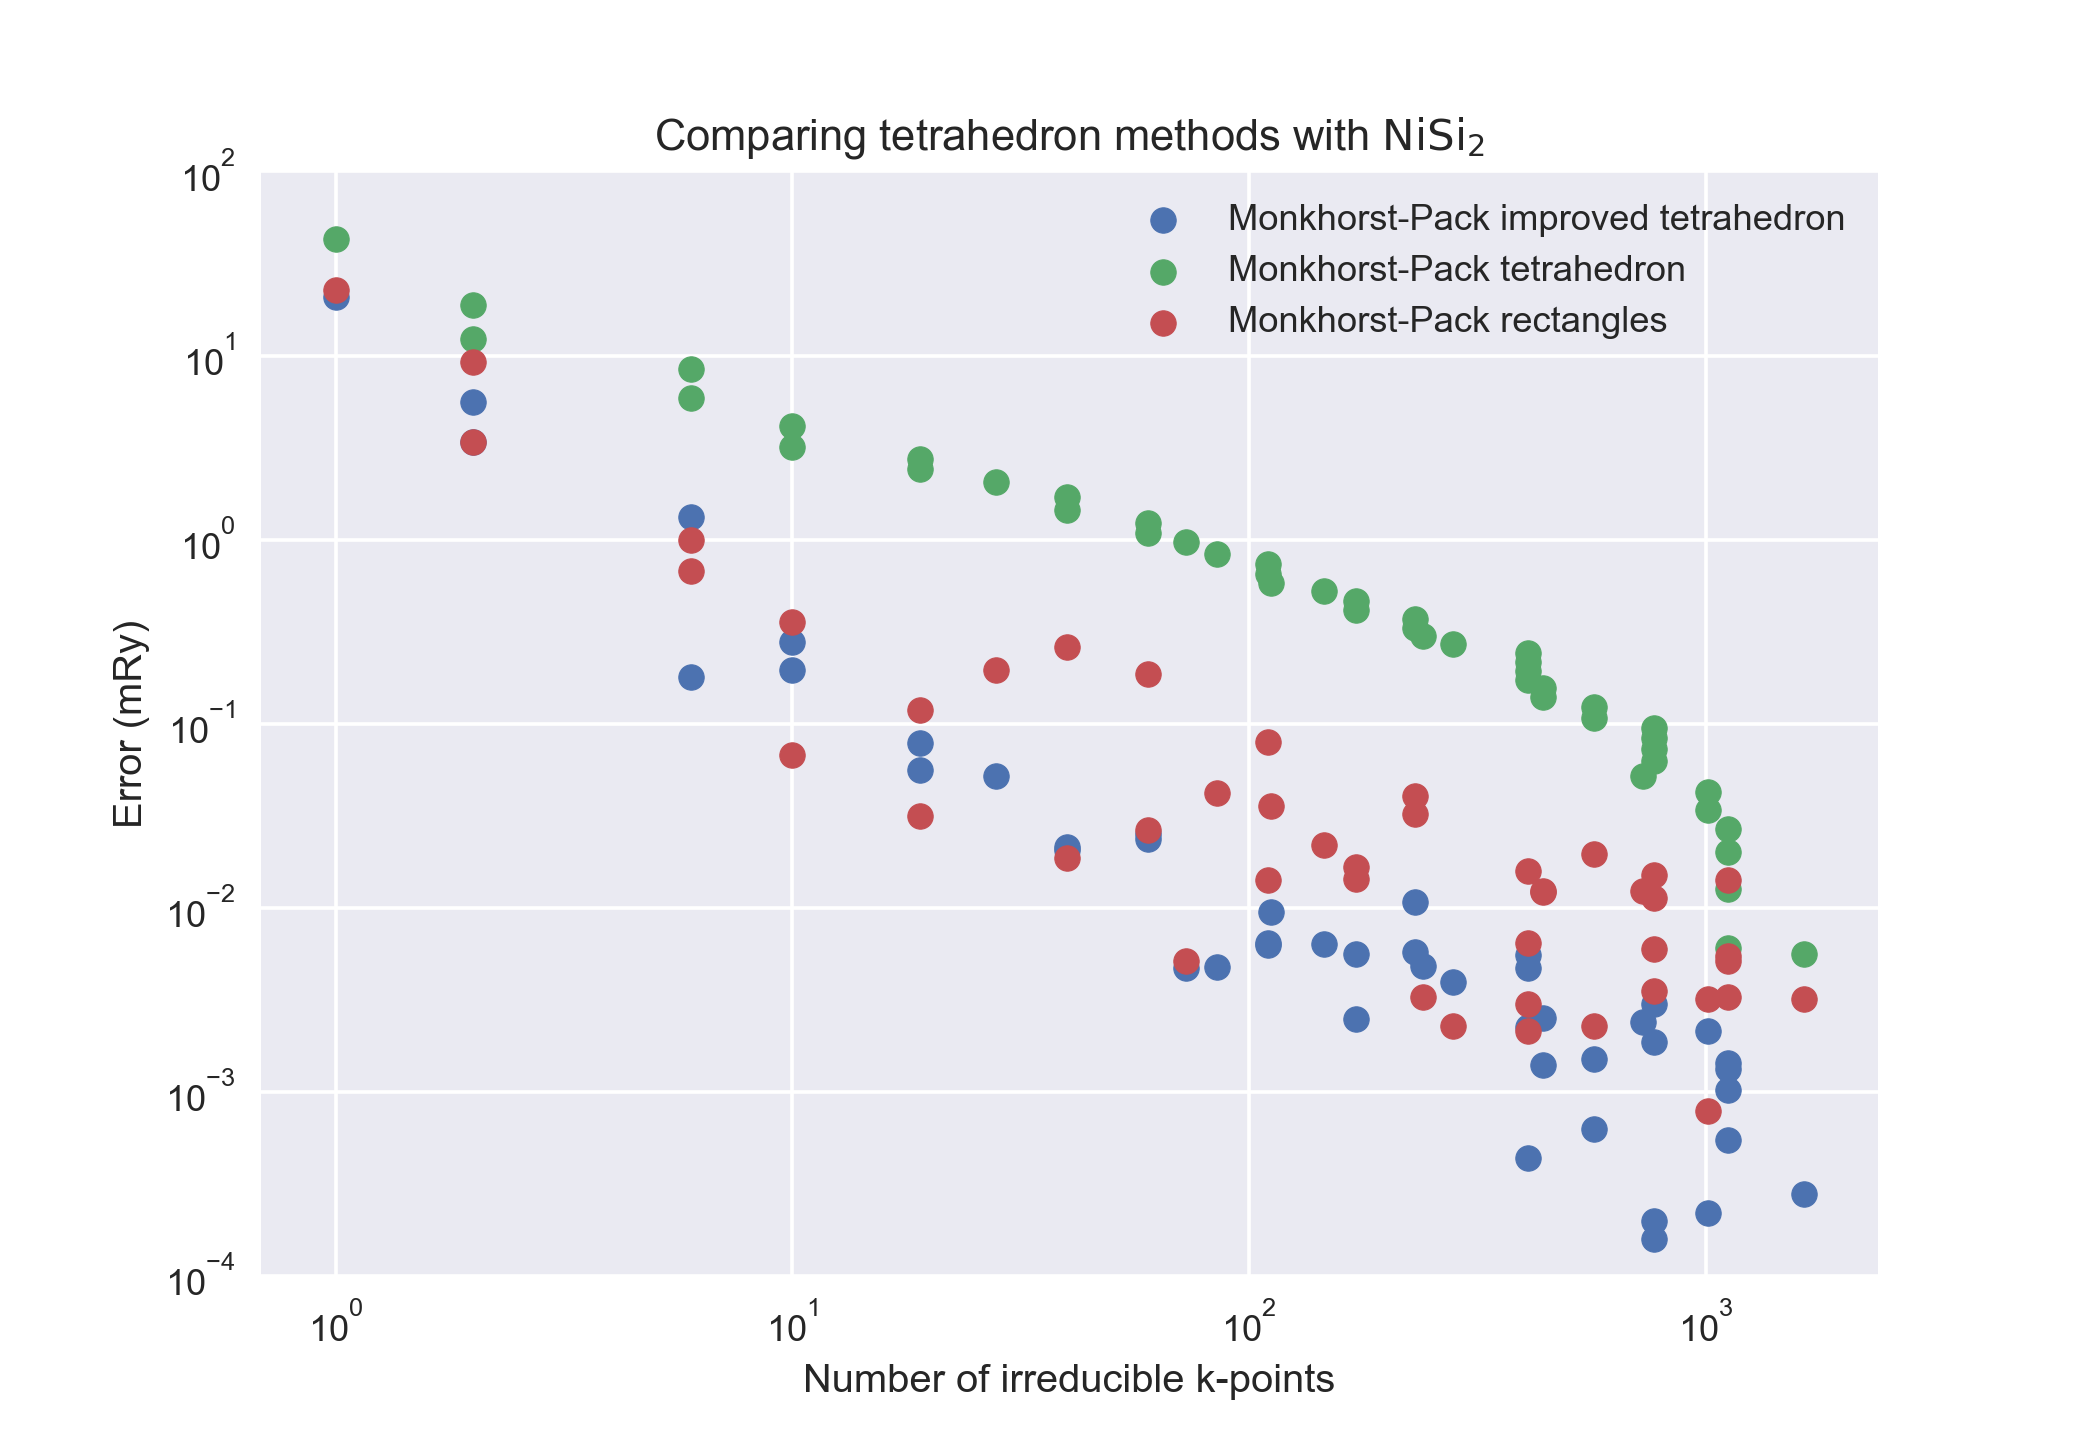

In [29]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
# for grid in np.array(NiSi2_data.grid):
for grid in ["Monkhorst-Pack"]:
    # for occupation in np.array(NiSi2_data.occupation):
    for occupation in ["tetrahedra", "tetrahedra_lin", "smearing"]:
    # for occupation in ["tetrahedra_lin"]:
        data = NiSi2_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)][:-1]
        data = np.array(data)[:-1]
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with $\mathrm{NiSi}_2$")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "NiSi2_fig3.pdf")
fig.savefig(file, bbox_inches="tight")

<IPython.core.display.Javascript object>


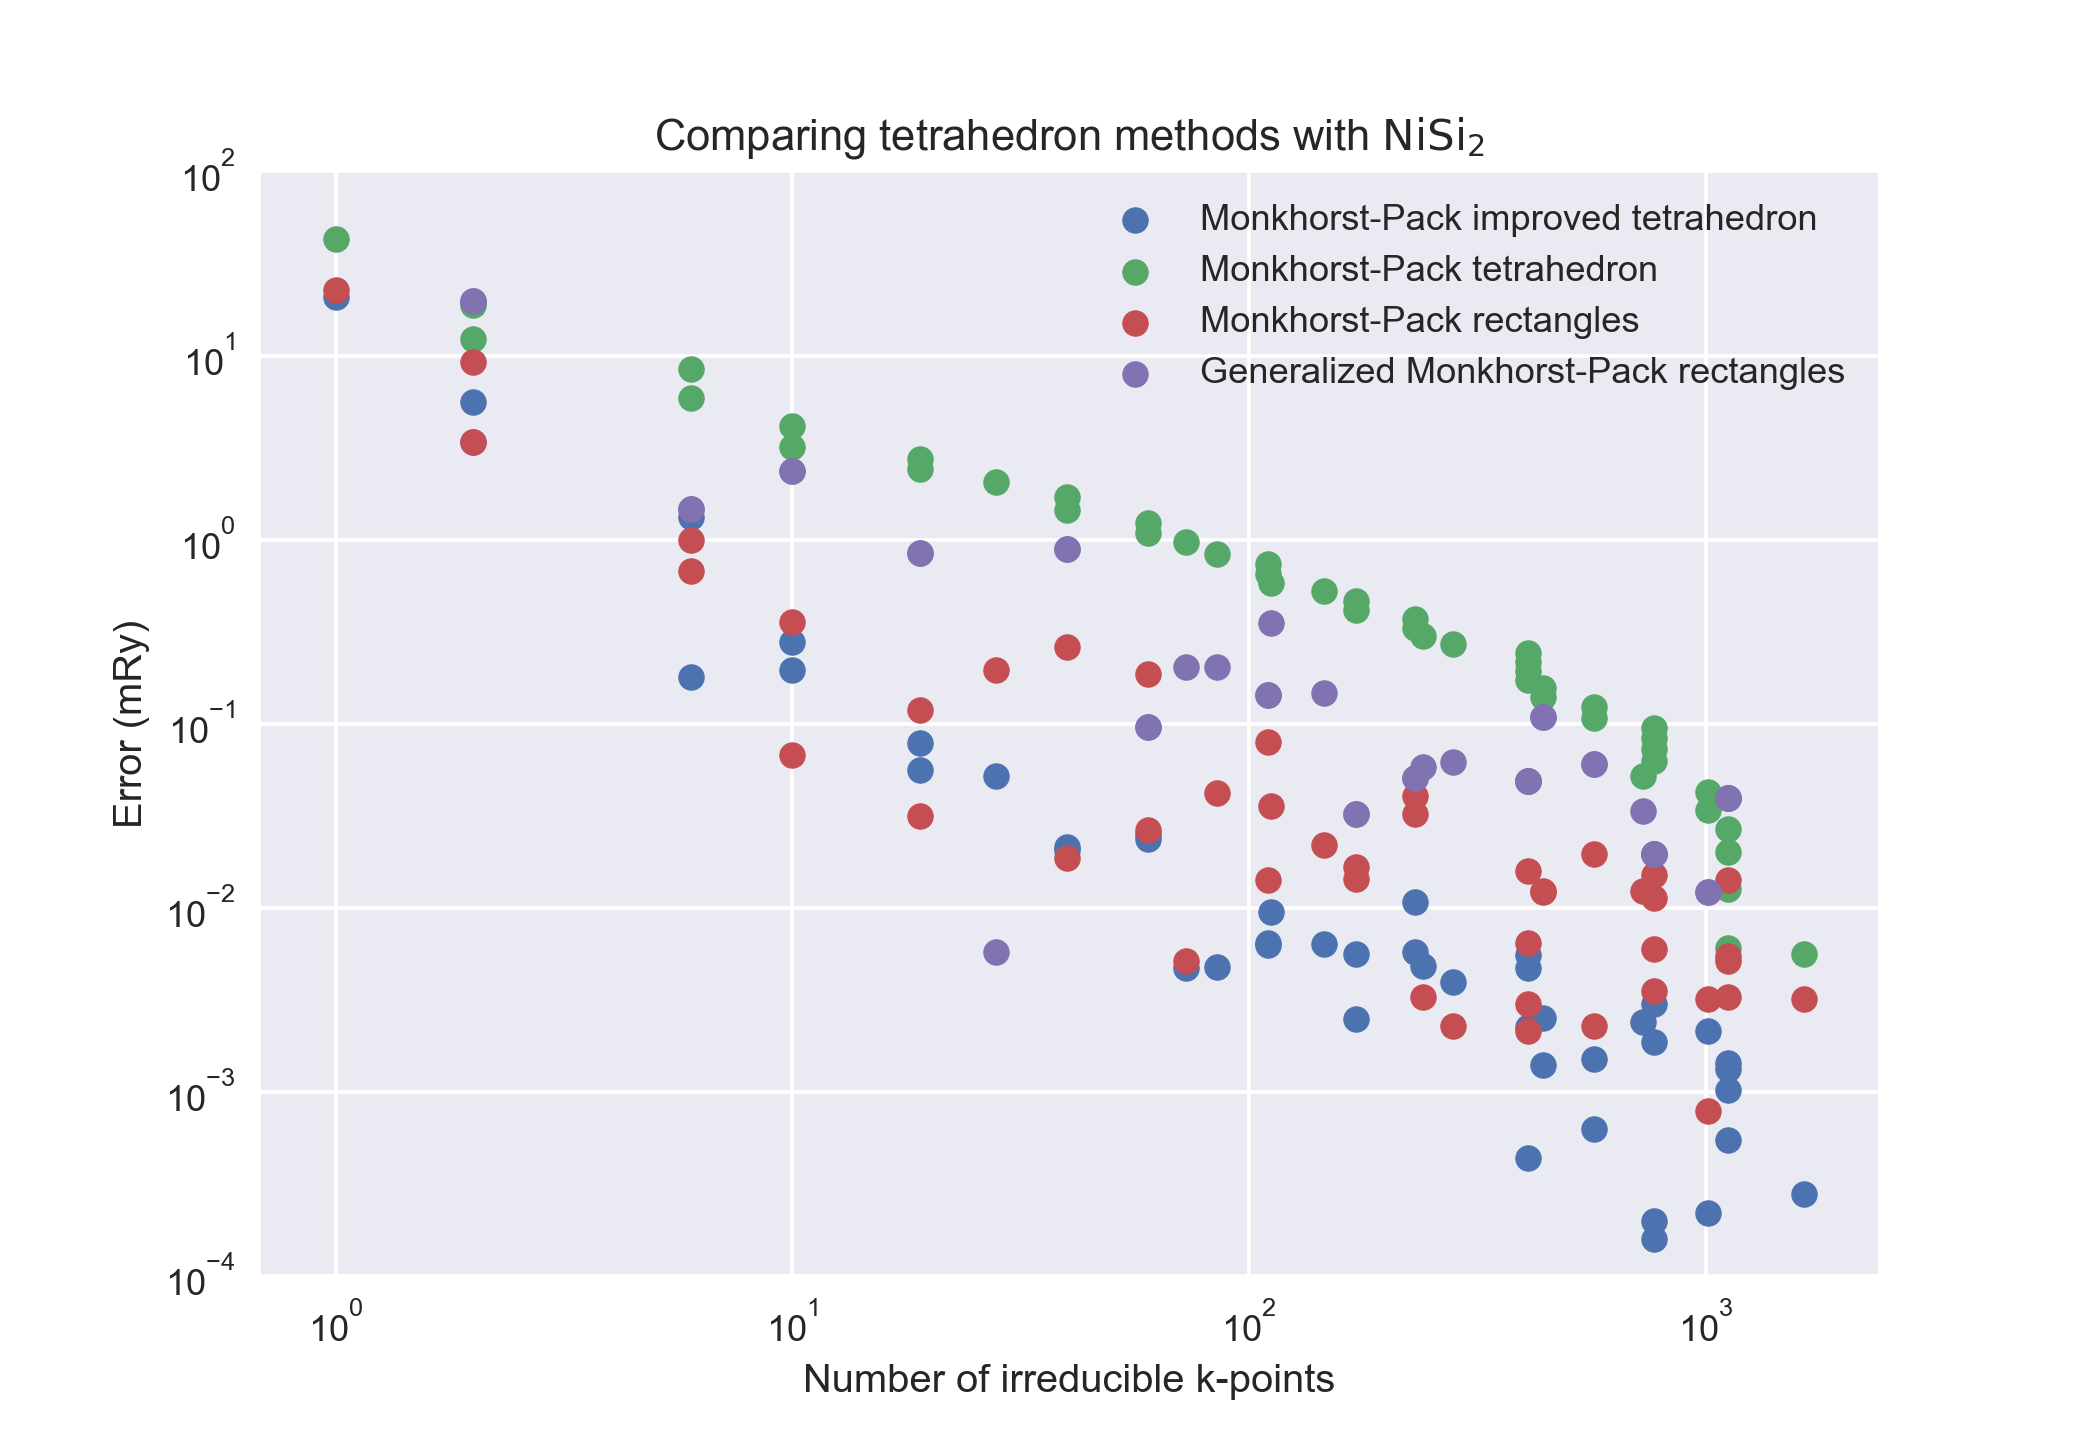

In [30]:
smearing = "gaussian"
energy = "total energy"
smearing_value = 1e-06
offset = "[0, 0, 0]"

fig,ax = plt.subplots()
for grid in np.array(NiSi2_data.grid):
    for occupation in np.array(NiSi2_data.occupation):
        if grid == "Generalized Monkhorst-Pack":
            if ((occupation == "tetrahedra") or 
                (occupation == "tetrahedra_lin")):
                continue
        data = NiSi2_data.sel(energy=energy, grid=grid, offset=offset,
                           occupation=occupation, smearing=smearing, 
                           smearing_value=smearing_value)
        kpts = [int(k.strip("[]").replace(",", "").split()[1]) 
                for k in np.array(data.kpoints)][:-1]
        data = np.array(data)[:-1]
        ans_ind = np.argmax(kpts)
        error = np.array([abs(d - data[ans_ind]) for d in data])*1e3
        ax.scatter(kpts[:-1], error[:-1], label=grid + " " + occ_dict[occupation])

# ax.set_yscale("log")
ax.set_title("Comparing tetrahedron methods with $\mathrm{NiSi}_2$")
ax.set_xlabel("Number of irreducible k-points")
ax.set_ylabel("Error (mRy)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-4, 100)
lgd = ax.legend(loc='upper right')
fig.show()
file = os.path.join(file_path, "NiSi2_fig4.pdf")
fig.savefig(file, bbox_inches="tight")